## Data Science Fundamentals
# Lecture 5: Scientific visualisation II
## Graphs, charts and plots

------
 ##### DSF - University of Glasgow - Chris McCaig - 2020/2021

LaTeX commands

$$\newcommand{\vec}[1]<p><strong>SyntaxError</strong>: unexpected character after line continuation character (<ipython-input-3-470fb1740f13>, line 1)</p>
 
\newcommand{\real}{\mathbb{R}}
\DeclareMathOperator*{\argmin}{arg\,min}
\vec{x}
\real
$$

In [132]:
import IPython.display
IPython.display.HTML("""
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>""")

# Summary
By the end of this unit you should know:
* linear, log and polar coordinate systems and their uses
* the use of point, line and area geoms to represent data and standard aesthetic mappings for them
* appropriate aesthetic mappings for colour information
* how to criticise scientific visualisations
* how to represent uncertainty accurately in a plot

## What you should be able to do
* Make graphs that are:
    * **Conceptually** correct: data is represented visually in a way that makes sense.
    * **Technically** correct: details of data representation are complete and accurate.
    * **Aesthetically** correct: data is represented a visually pleasing way.
* Have the **language** and **concepts** to discuss, criticise and improve visual representations.

----

# Geoms

### Markers
Markers are *geoms* that represent bare points in a coordinate system. These typically as a visual record of an discrete **observation**. In the simplest case, they are literally just points marked on a graph; however, they typically convey more information.
There are several important uses of markers:

#### Layer identification
The geom used for marking points can be used to differentiate different layers in a plot. Both the shape and the colouring can be modified to distinguish layers. Excessive numbers of markers quickly become hard to read!

<img src="imgs/marker_reference.png">

*Image: markers available in Matplotlib. [Adapted from the Matplotlib documentation]
(https://matplotlib.org/examples/lines_bars_and_markers/marker_reference.html)*


Text(0.5, 1.0, 'Layers denoted by marker geometry')

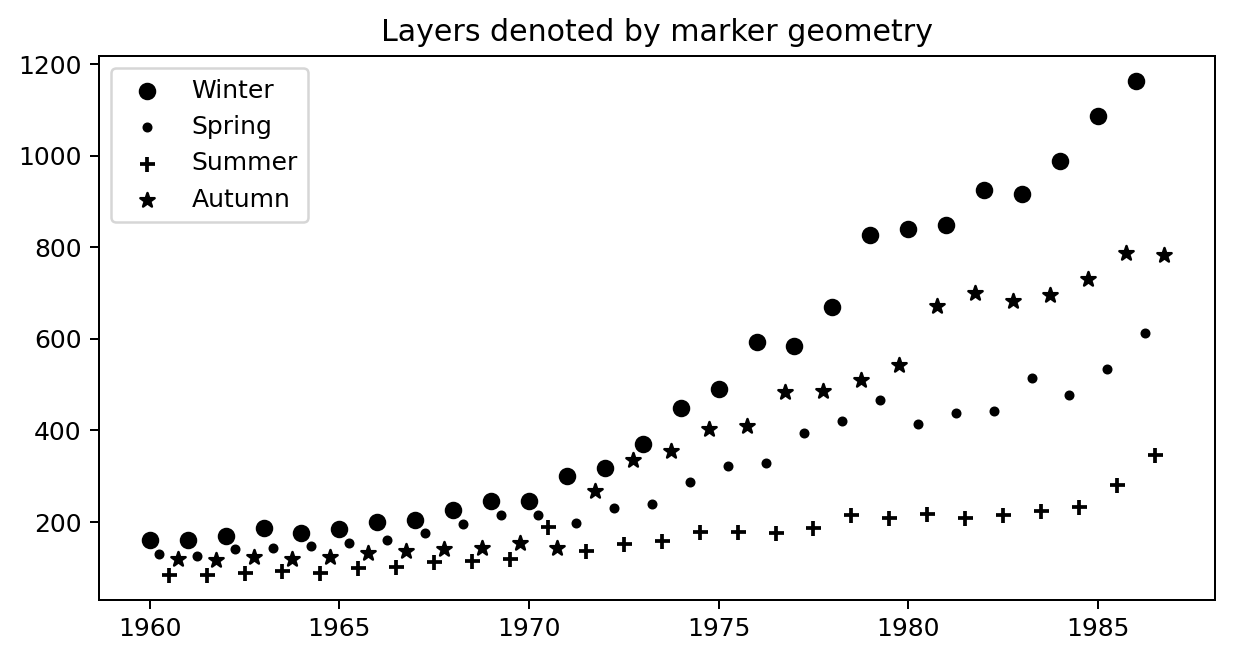

In [106]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


q1 = gas[::4, :]
q2 = gas[1::4, :]
q3 = gas[2::4, :]
q4 = gas[3::4, :]

ax.scatter(q1[:, 1], q1[:, 2], label="Winter", marker="o", color="k")
ax.scatter(q2[:, 1], q2[:, 2], label="Spring", marker=".", color="k")
ax.scatter(q3[:, 1], q3[:, 2], label="Summer", marker="+", color="k")
ax.scatter(q4[:, 1], q4[:, 2], label="Autumn", marker="*", color="k")
ax.legend()
ax.set_title("Layers denoted by marker geometry")

Text(0.5, 1.0, 'Layers denoted by marker colour')

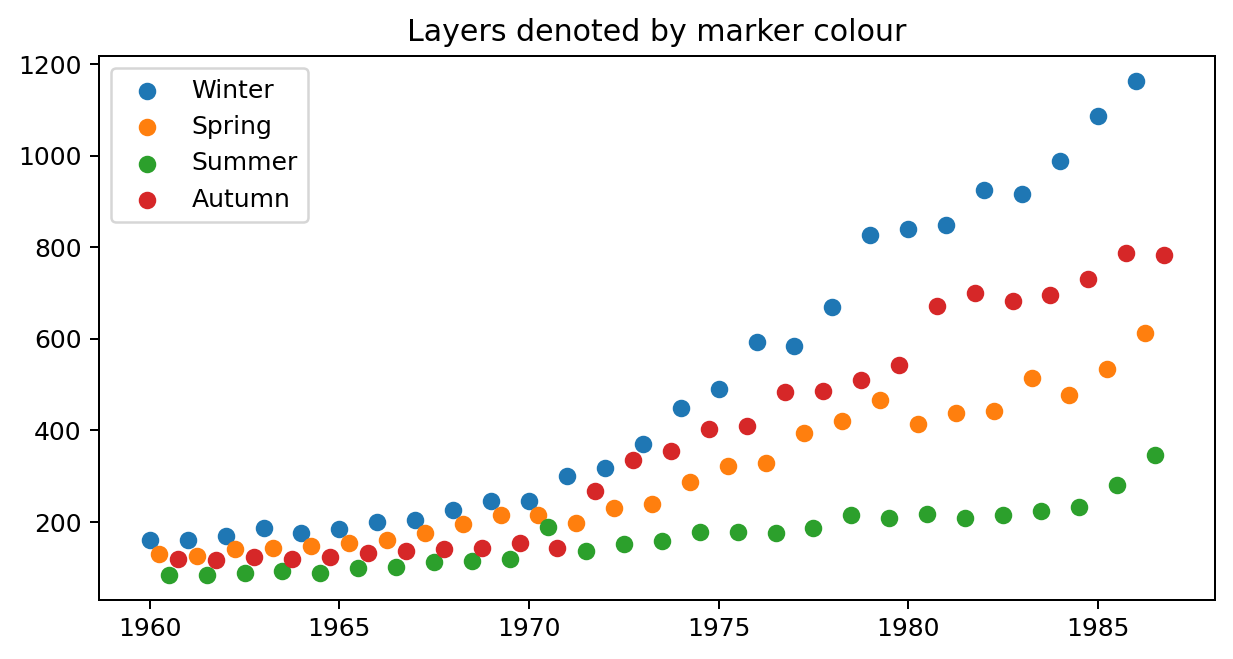

In [107]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(q1[:,1], q1[:,2], label='Winter', marker='o', color='C0')
ax.scatter(q2[:,1], q2[:,2], label='Spring', marker='o', color='C1')
ax.scatter(q3[:,1], q3[:,2], label='Summer', marker='o', color='C2')
ax.scatter(q4[:,1], q4[:,2], label='Autumn', marker='o', color='C3')
ax.legend()
ax.set_title("Layers denoted by marker colour")

## Colour choices
Choosing good colour for plots is essential in comprehension. Care should be taken if plots may be viewed in black and white printouts, where colour differences will become differences in shade alone.  Also, a significant portion of the population suffers from some form of colour blindness, and pure colour distinctions will not be visible to these readers.


## Markers: Scalar attributes
Markers can also be used to display a *third* or event *fourth* scalar attribute, instead of identifying layers in a plot. In this case we, are not visualising just a pair of vectors $\vec{x}, \vec{y}$, but $\vec{x}, \vec{y}, \vec{z}$ or possibly $\vec{x}, \vec{y}, \vec{z}, \vec{w}$. This is done by modulating the *scaling* or *colouring* of each marker. 

The plots below show measurements of earthquakes around Fiji. Each measurement has a 2D position (on the surface of the Earth), a depth (in km below surface) and a magnitude (in the Richter scale), for a total of four variables.

In [53]:
# earthquake data
# columns
# lat,long,depth,mag,n_stations
quakes = np.loadtxt("data/quakes.txt")

Text(0, 0.5, 'Latitude')

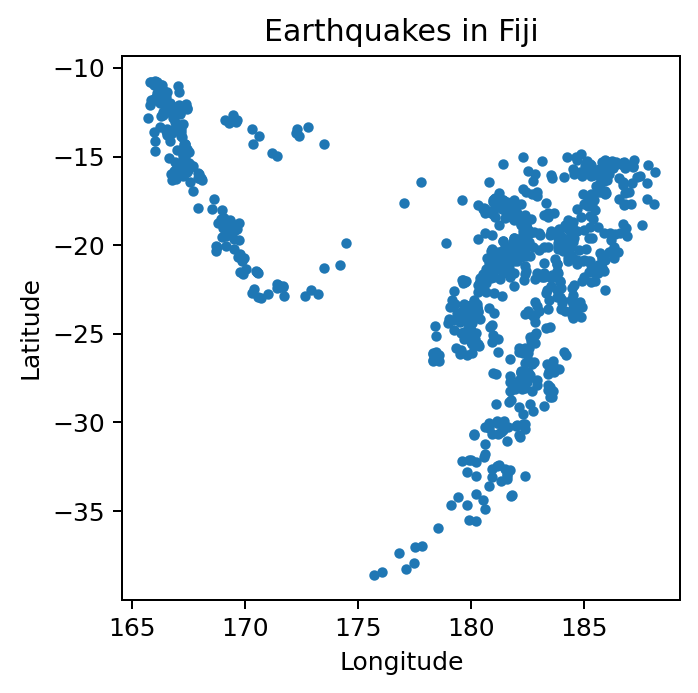

In [115]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1)
paths = ax.scatter(quakes[:, 1], quakes[:, 0], s=10)
ax.set_title("Earthquakes in Fiji")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

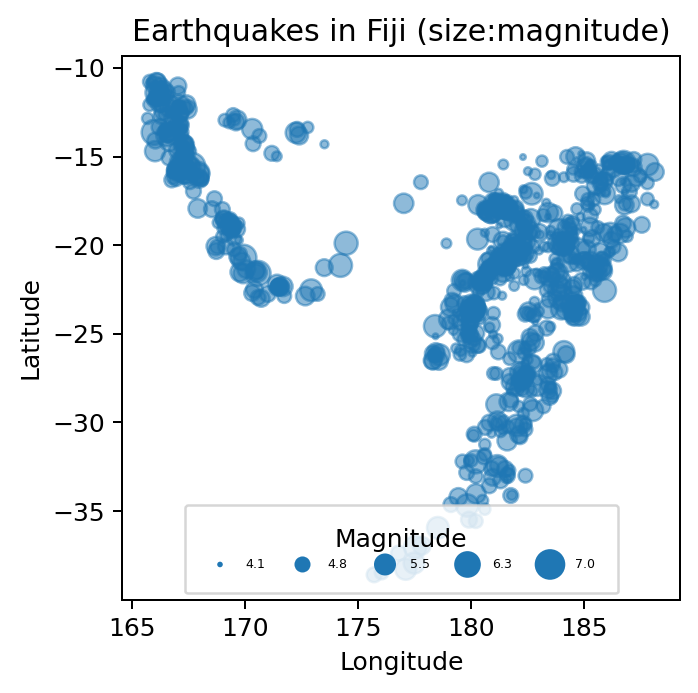

In [119]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1)
sizes = (quakes[:, 3] - 4.0) * 50
paths = ax.scatter(quakes[:, 1], quakes[:, 0], s=sizes, alpha=0.5)
ax.set_title("Earthquakes in Fiji (size:magnitude)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# generate a legend for the scales of markers
def scale_bar(real_scale, visual_scale):
    ls = []
    for scale in visual_scale:
        l = ax.scatter([], [], s=scale, edgecolors="none", facecolors="C0")
        ls.append(l)
    labels = ["%.1f" % i for i in real_scale]
    leg = ax.legend(
        ls,
        labels,
        ncol=len(real_scale),
        frameon=True,
        fontsize=5,
        handlelength=2,
        loc=8,
        borderpad=1.8,
        handletextpad=1,
        title="Magnitude",
        scatterpoints=1,
    )


scale_bar(np.linspace(4.1, 7.0, 5), np.linspace(5.0, 150.0, 5))

Text(0, 0.5, 'Latitude')

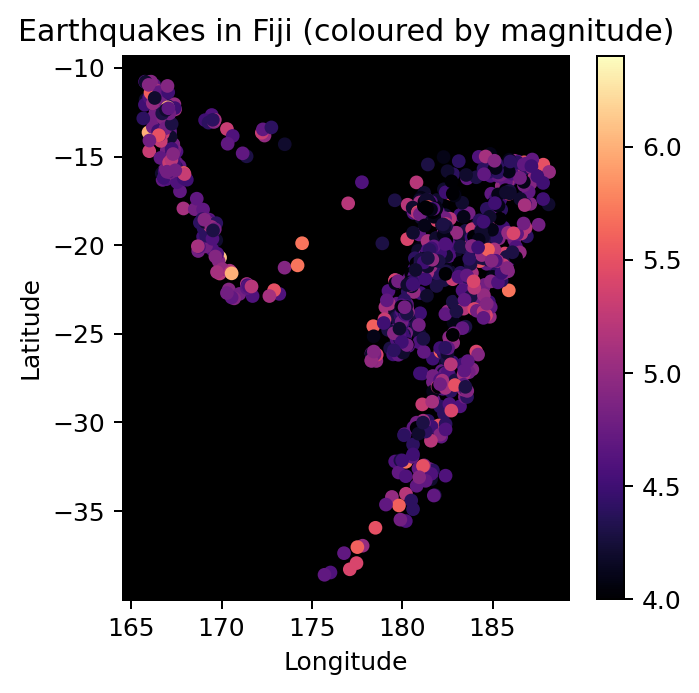

In [131]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor("black")
paths = ax.scatter(quakes[:, 1], quakes[:, 0], c=quakes[:, 3], cmap="magma", s=20)
fig.colorbar(paths)
ax.set_title("Earthquakes in Fiji (coloured by magnitude)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

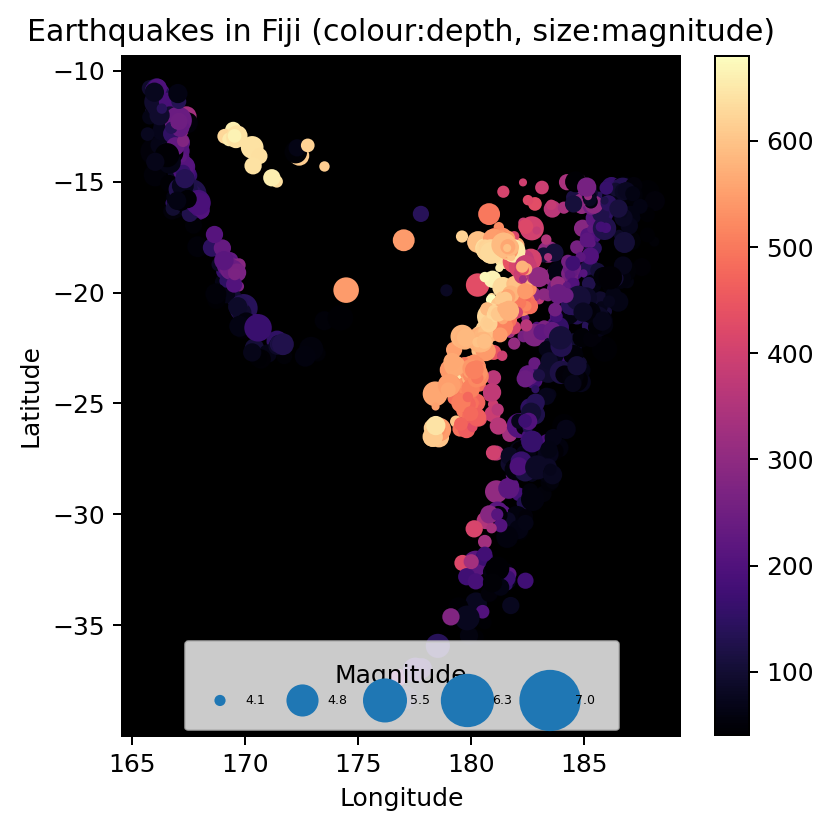

In [129]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor("black")
paths = ax.scatter(quakes[:, 1], quakes[:, 0], c=quakes[:, 2], s=sizes, cmap="magma")
fig.colorbar(paths)
ax.set_title("Earthquakes in Fiji (colour:depth, size:magnitude)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
scale_bar(np.linspace(4.1, 7.0, 5), np.linspace(20.0, 600.0, 5))

#### Colour maps

Colouring of markers is done via a **colour map**, which maps scalar values to colours. 

Colour maps should always be presented with a **colour bar** which shows the mapping of values to colours. This is an example of a **guide** used for an aesthetic **mapping** beyond the 2D coordinate system.


The colour map choice is important. A colour map maps a continuous variable $x$ to a colour, usually specified in the form of (red,green,blue) triplets. There are many choices for this mapping, but only a few *good* ones.

<img src="imgs/colormaps.png">

*Image: colormaps in matplotlib. Adapted from the [matplotlib documentation](https://matplotlib.org/examples/color/colormaps_reference.html)*


### Unsigned scalar
* If the data to be represented is a positive scalar (e.g. heights of people), use a colour map with **monotonically varying brightness**. This means that as the attribute increases, the colour map should get consistently lighter or darker.  `viridis` is good, as is `magma`. These are **perceptually uniform**, such that a change in value corresponds to a perceptually uniform change in intensity across the whole scale (the human visual system is very nonlinear, and these scales compensate for this nonlinearity). Grayscale or monochrome maps can be used, but colours with brightness+hue are often easier to interpret.

* **monotonic brightness** increasing data value always leads to an increase in visual brightness
* **perceptually uniform** a constant interval increase in data value leads to a perceptually constant increase in value.

### Perceptual linearity

<img src="imgs/mpl_colormaps.png">

**Colormaps shown in grayscale. Good scales should be monotonic (i.e. always increase/decrease in brightness)**

<img src="imgs/nonlinear_jet.png">

**BAD and NONLINEAR: the notches do not appear to be even**

<img src="imgs/linear_colors.jpg">

**GOOD and LINEAR: notches are even**



#### Colour map examples

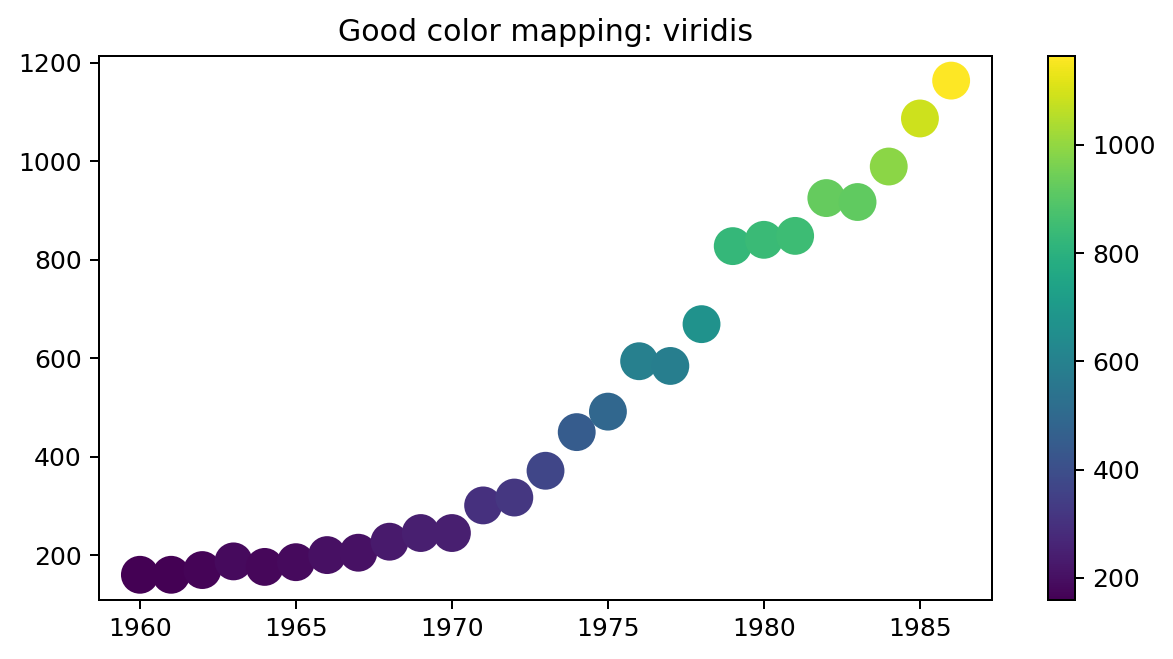

In [58]:
def plot_w_colorbar(x,y,cmap,title):    
    # chunky marker plot, using coloured markers with the given colour map
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    paths = ax.scatter(x, y, c=y, cmap=cmap, s=200)
    fig.colorbar(paths)
    ax.set_title(title)

plot_w_colorbar(q1[:,1], q1[:,2], cmap='viridis', title='Good color mapping: viridis')

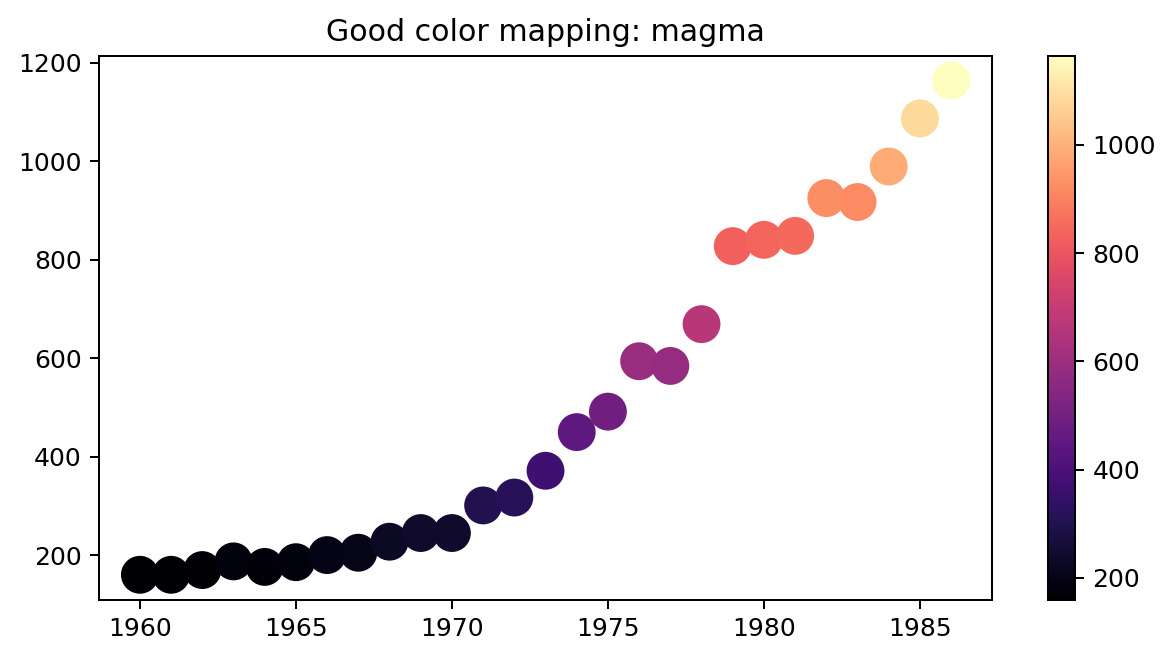

In [59]:
plot_w_colorbar(q1[:,1], q1[:,2], cmap='magma', title='Good color mapping: magma')

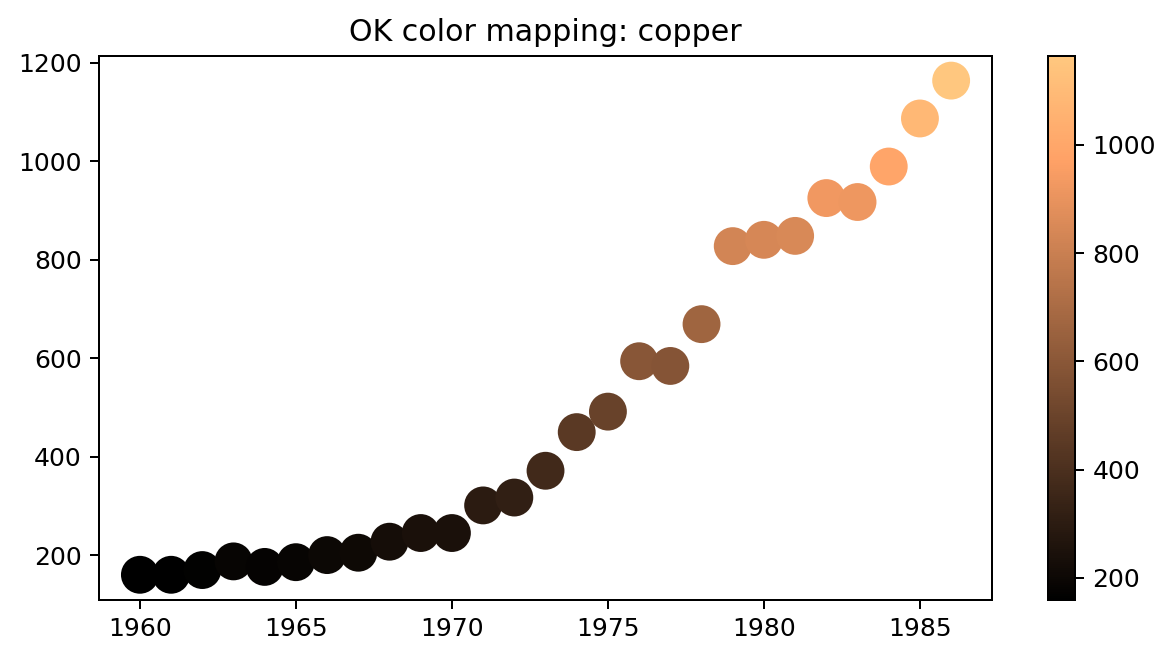

In [60]:
plot_w_colorbar(q1[:,1], q1[:,2], cmap='copper', title='OK color mapping: copper')

Some colour maps, like the old-fashioned `jet` colourmap are terrible for this. They introduce **false contours** in visualisations because they do not have the property of monotonic brightness. (see [this article](https://www.mathworks.com/tagteam/81137_92238v00_RainbowColorMap_57312.pdf) for details on why this is really bad and can lead to misleading results).

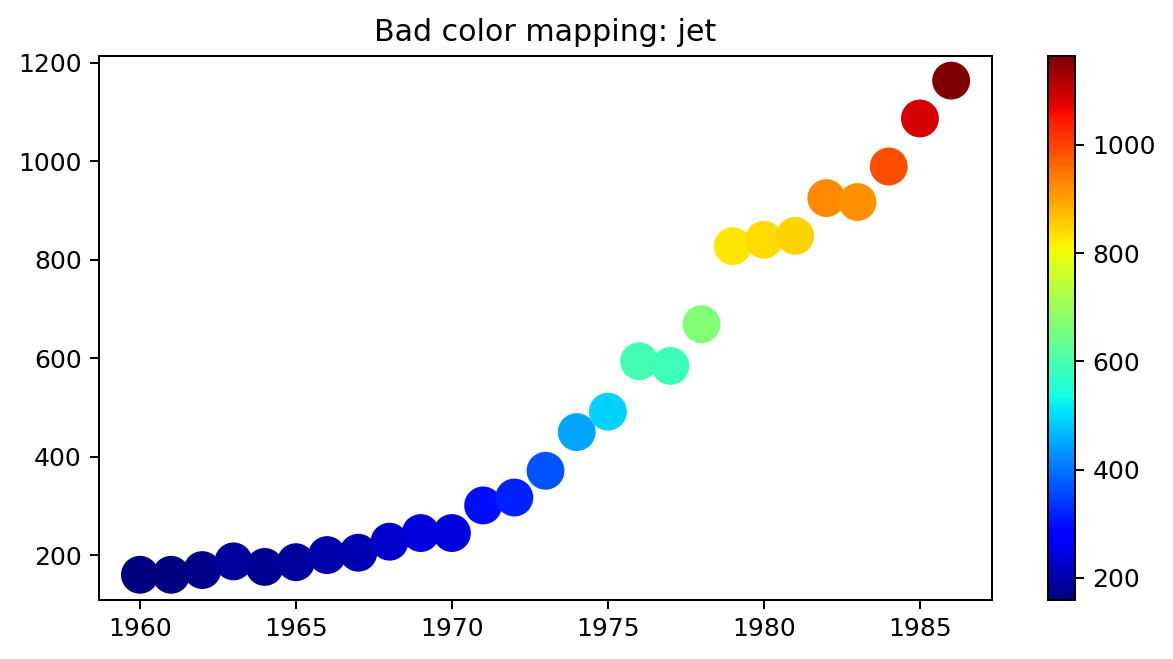

In [61]:
plot_w_colorbar(q1[:,1], q1[:,2], 
                cmap='jet', title='Bad color mapping: jet')

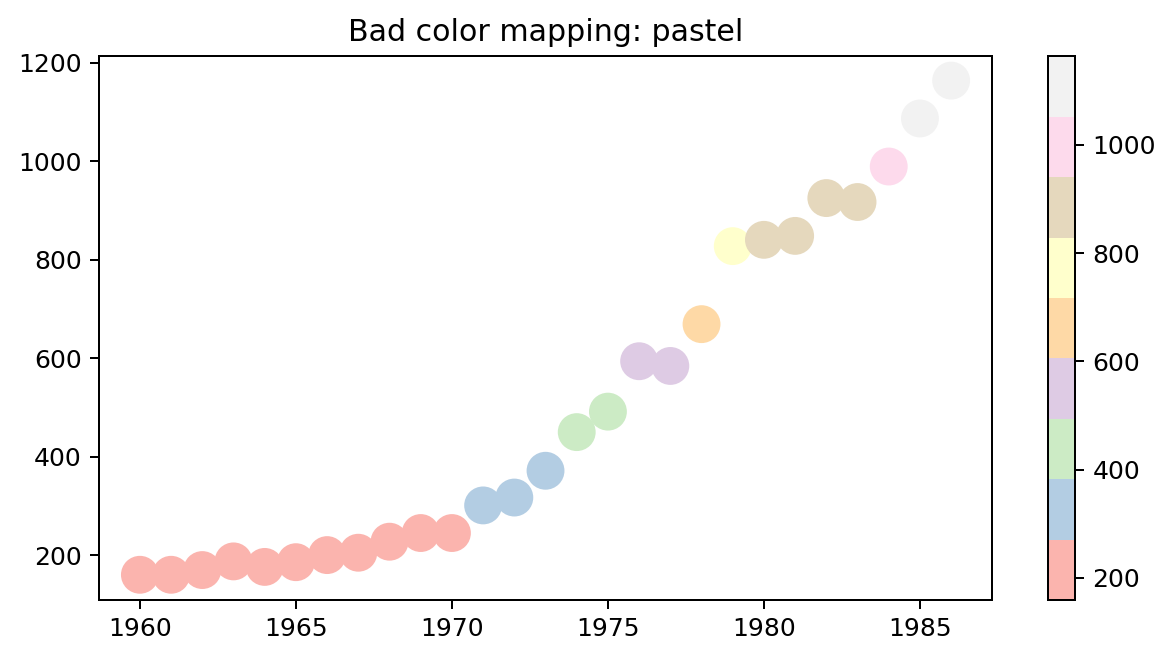

In [62]:
plot_w_colorbar(q1[:,1], q1[:,2], cmap='Pastel1',
                title='Bad color mapping: pastel')

## Make it pop
There is a web applet where you can experiment with the distortion in contrast that bad colourmaps produce:

https://predictablynoisy.com/makeitpop-intro 

### Signed scalar
* If your data is signed (and the sign matters), use a colour map which diverges around 0, and is monotonic in brightness in each side of 0. 

Text(0.5, 1.0, 'Divergent color mapping for signed values')

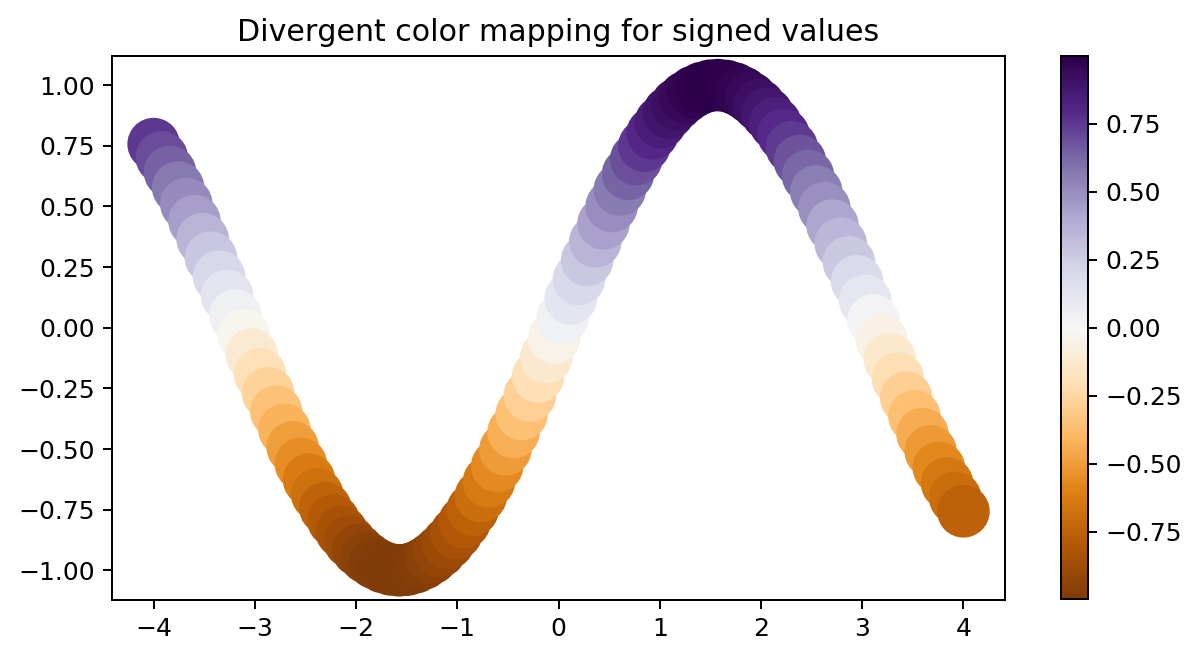

In [63]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = np.linspace(-4, 4, 100) 
y = np.sin(x)
paths = ax.scatter(x, y, c=y, cmap='PuOr', s=400)
fig.colorbar(paths)
ax.set_title("Divergent color mapping for signed values")

Text(0.5, 1.0, 'Divergent color mapping for signed values')

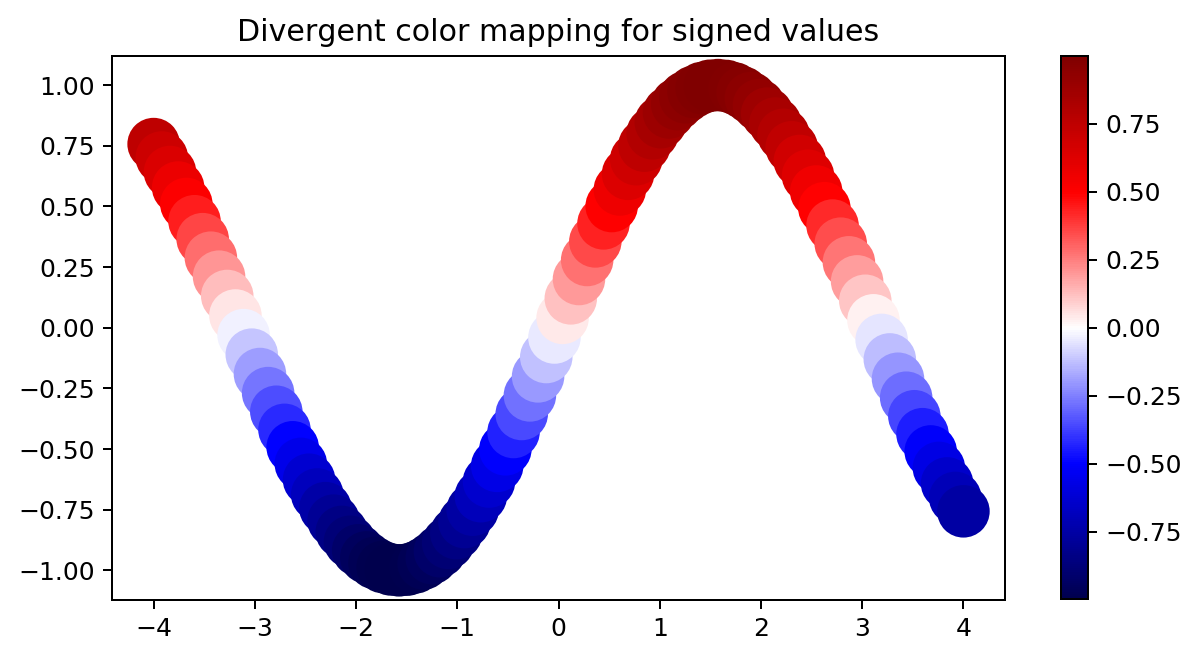

In [64]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = np.linspace(-4, 4, 100) 
y = np.sin(x)
paths = ax.scatter(x, y, c=y, cmap='seismic', s=400)
fig.colorbar(paths)
ax.set_title("Divergent color mapping for signed values")

Text(0.5, 1.0, 'Very bad colour map for signed values')

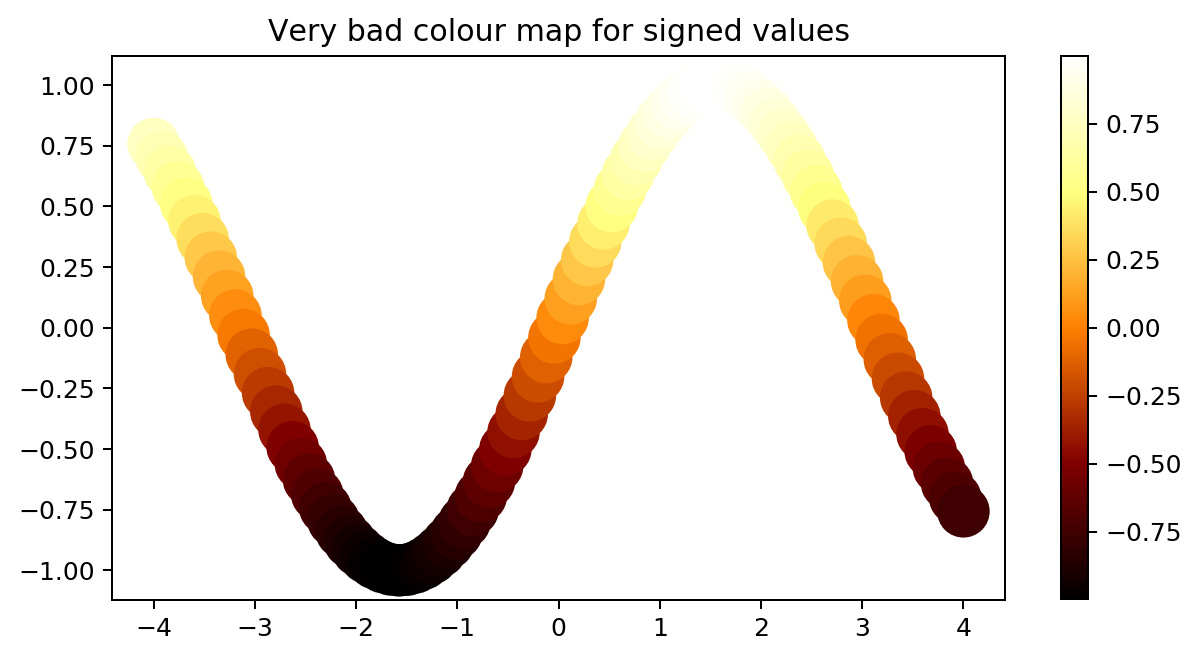

In [65]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = np.linspace(-4, 4, 100) 
y = np.sin(x)
paths = ax.scatter(x, y, c=y, cmap='afmhot', s=400)
fig.colorbar(paths)
ax.set_title("Very bad colour map for signed values")

### Scaling colourmaps

Scale data to colorscales appropriately, and always provide a colour bar for reference. It **must** be possible to invert the visual units to recover the data units, and the colour bar is the essential **guide** for that purpose.

## Lines
Lines are *geoms* that connect points together. A line should be used if it makes sense to ask what is *between* two data points; i.e. if there is a continuum of values. This makes sense if there are two *ordered* arrays which represent samples from a *continuous* function 

$$y=f(x).$$

### Linestyles
Line geoms can have
**variable thickness and variable colour**

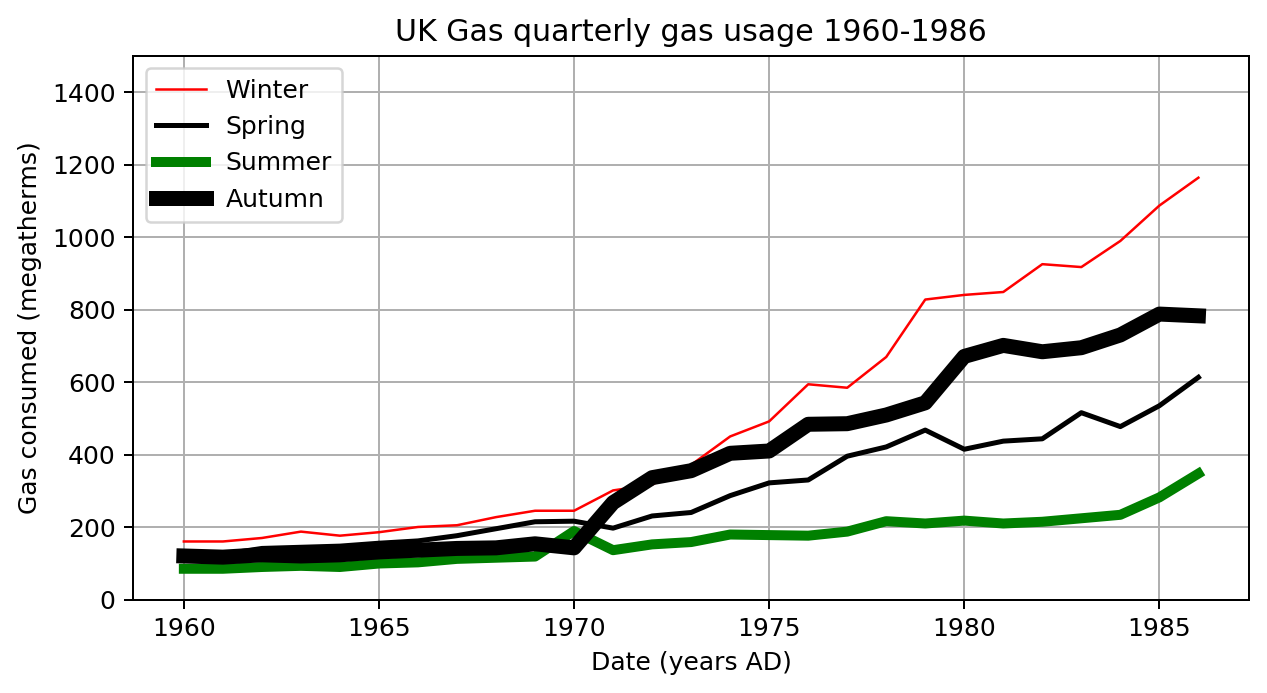

In [66]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(q1[:,1], q1[:,2], label='Winter', linewidth=1, color='red')
ax.plot(q1[:,1], q2[:,2], label='Spring', linewidth=2, color='black')
ax.plot(q1[:,1], q3[:,2], label='Summer', linewidth=4, color='green')
ax.plot(q1[:,1], q4[:,2], label='Autumn', linewidth=6, color='black')

ax.set_xlabel('Date (years AD)')
ax.set_ylabel('Gas consumed (megatherms)')
ax.grid("on")
ax.legend()
ax.set_ylim(0,1500)
ax.set_title("UK Gas quarterly gas usage 1960-1986")
ax.legend()

They may also have different **dash patterns** which make it easy(ish) to distinguish different lines  without relying on colour. Colour may not be available in printed form, and excludes readers with colour blindness.

More than four dash patterns on one plot is bad idea, both from an aesthetic and a communication stand point.

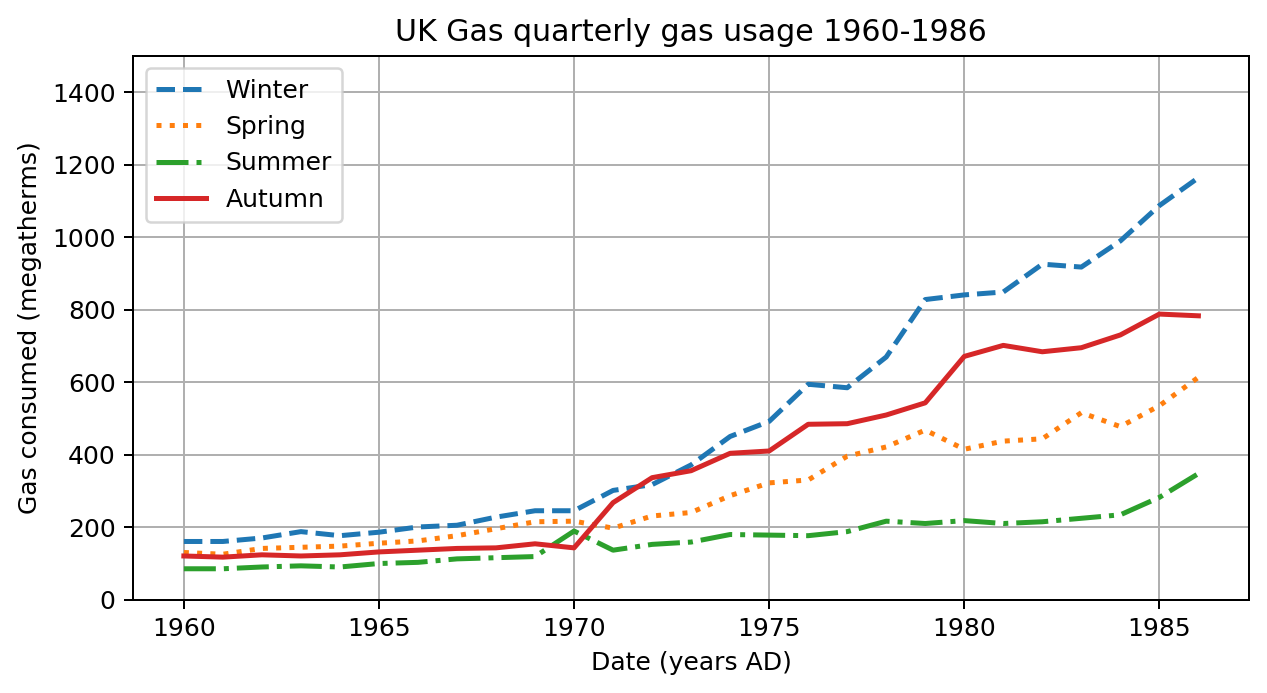

In [67]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(q1[:,1], q1[:,2], label='Winter', linestyle='--', linewidth=2)
ax.plot(q1[:,1], q2[:,2], label='Spring', linestyle=':', linewidth=2)
ax.plot(q1[:,1], q3[:,2], label='Summer', linestyle='-.', linewidth=2)
ax.plot(q1[:,1], q4[:,2], label='Autumn', linestyle='-', linewidth=2)

ax.set_xlabel('Date (years AD)')
ax.set_ylabel('Gas consumed (megatherms)')
ax.grid("on")
ax.legend()
ax.set_ylim(0,1500)
ax.set_title("UK Gas quarterly gas usage 1960-1986")
ax.legend()

### The staircase and the bar
In some cases, it makes sense to join points with lines (because they form a continuous series), but we know that the value cannot have changed between measurements. For example, imagine a simulation of a coin toss experiment, plotting the cumulative sum of heads seen. 

In [68]:
np.random.seed(5)
coins = np.random.randint(0,2,(8,))
total_heads = np.cumsum(coins) 

This makes no sense as an ordinary line graph. We can't be half way through a coin toss!

Text(0.5, 1.0, 'Coin toss experiment')

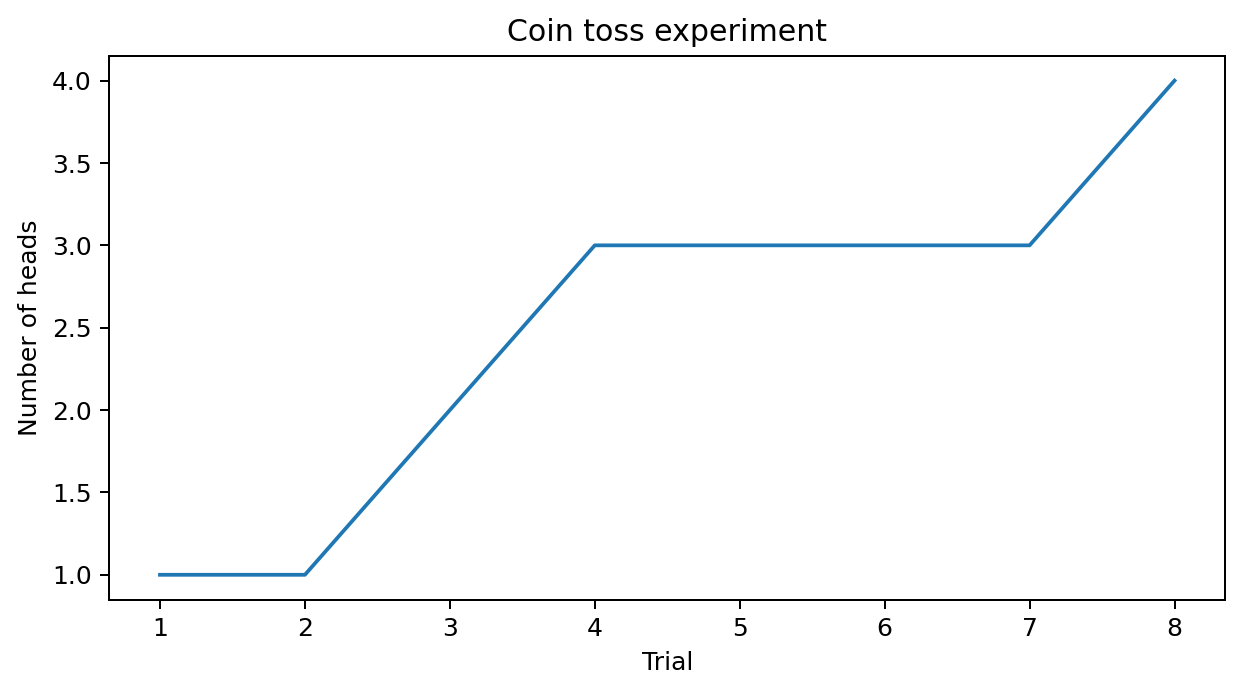

In [135]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
count = np.arange(len(total_heads))+1
ax.plot(count, total_heads)
ax.set_xlabel("Trial")
ax.set_ylabel("Number of heads")
ax.set_title("Coin toss experiment")

In this case, a **staircase** (or **step**) plot is appropriate. This connects points with lines, but keeping the value fixed until a new data point is observed, rather than linearly interpolating in between.

Text(0.5, 1.0, 'Coin toss experiment')

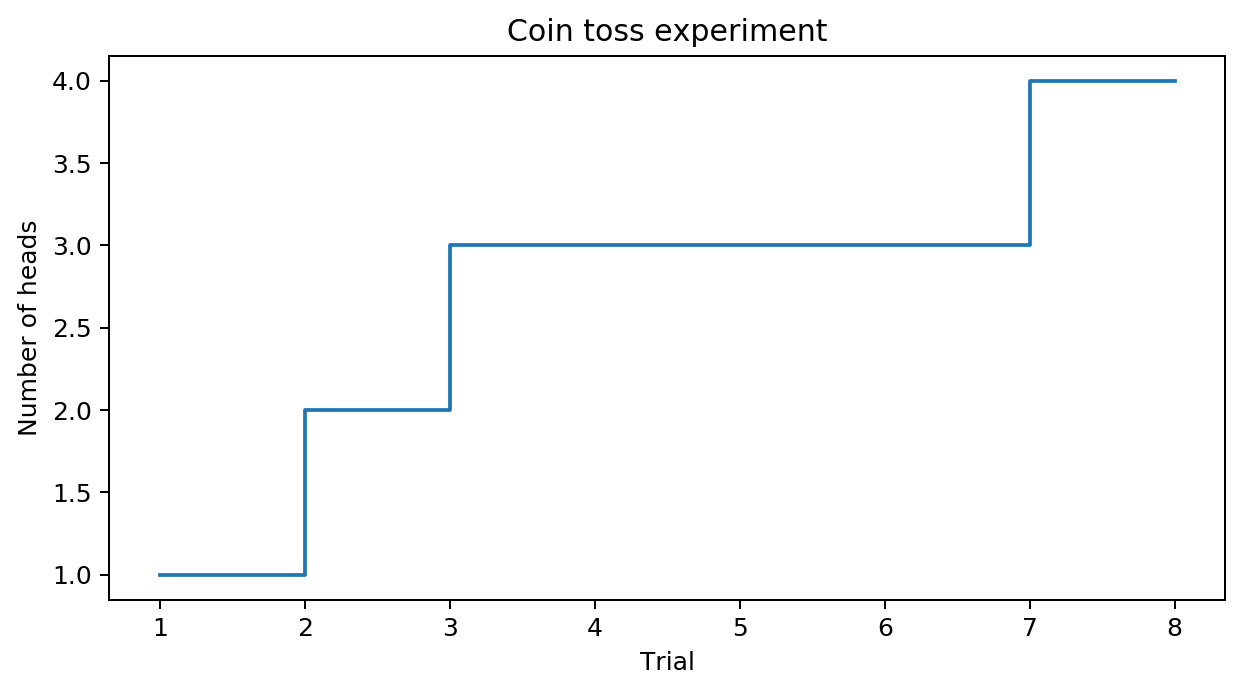

In [70]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.step(count, total_heads)
ax.set_xlabel("Trial")
ax.set_ylabel("Number of heads")
ax.set_title("Coin toss experiment")

If measurements of $x$ are naturally discrete (e.g. days of the week, conditions in an experiment), then a **bar chart** may be suitable. For example, the quarterly minimum and maximum gas data from the previous example naturally falls into years. These can be plotted as bars

Text(0.5, 1.0, 'UK gas usage, 1960-1986')

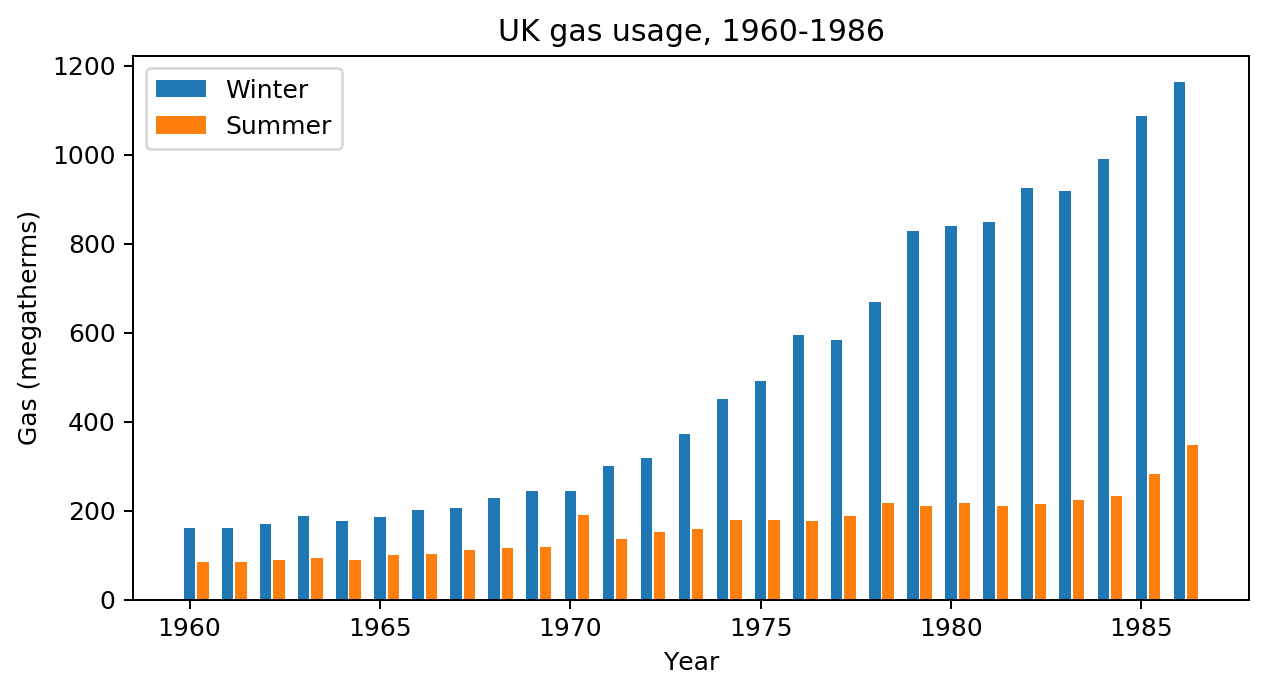

In [71]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.bar(q2[:,1]-0.25, q1[:,2], label="Winter", width=0.3)
ax.bar(q2[:,1]+0.1, q3[:,2], label="Summer", width=0.3)
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Gas (megatherms)")
ax.set_title("UK gas usage, 1960-1986")

## Alpha and transparency

Geoms can be rendered with different **transparency**, so that geoms layered behind show through. This is referred to as **opacity** (the inverse of transparency) or the **alpha** (equivalent to opacity). This can be useful when plotting large numbers of geoms which overlap (e.g. on a dense scatterplot), or to emphasise/deemphasise certain geoms, as with line thickness.

Transparency should be used judiciously; a plot with many transparent layers may be hard to interpret, but it can be a very effective way of providing visual emphasis.


### Alpha to mitigate geom overlap

Text(0, 0.5, 'Latitude')

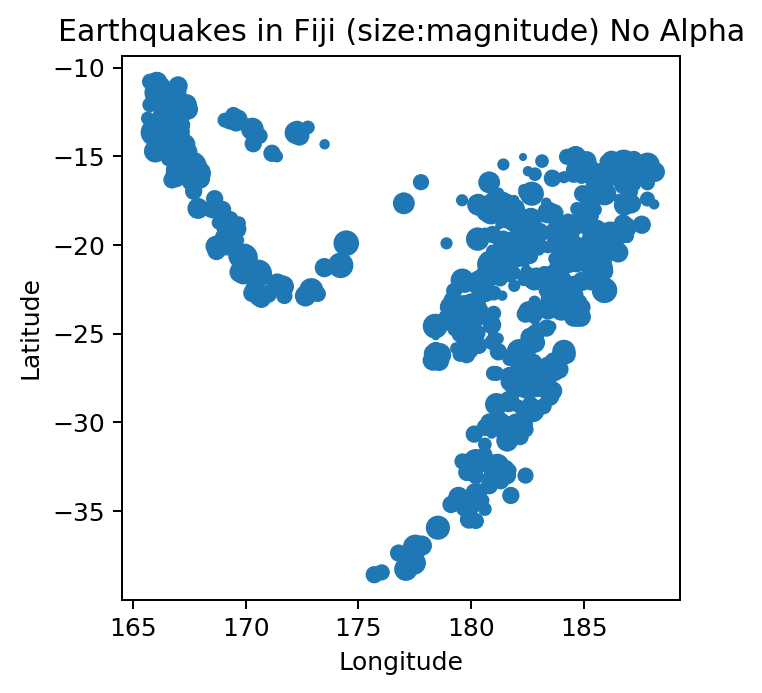

In [72]:
# low opacity
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
sizes = (quakes[:,3]-4.0) * 50#
paths = ax.scatter(quakes[:,1], quakes[:,0], s=sizes, alpha=1.0)
ax.set_title("Earthquakes in Fiji (size:magnitude) No Alpha")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

Text(0, 0.5, 'Latitude')

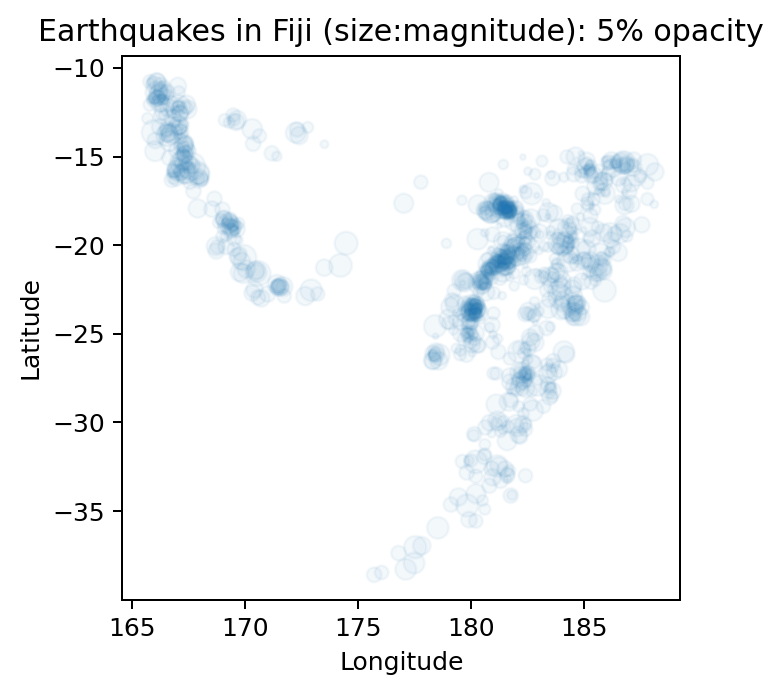

In [137]:
# low opacity
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
sizes = (quakes[:,3]-4.0) * 50#
paths = ax.scatter(quakes[:,1], quakes[:,0], s=sizes, 
                   alpha=0.05)
ax.set_title("Earthquakes in Fiji (size:magnitude): 5% opacity")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

### Alpha for emphasising geoms

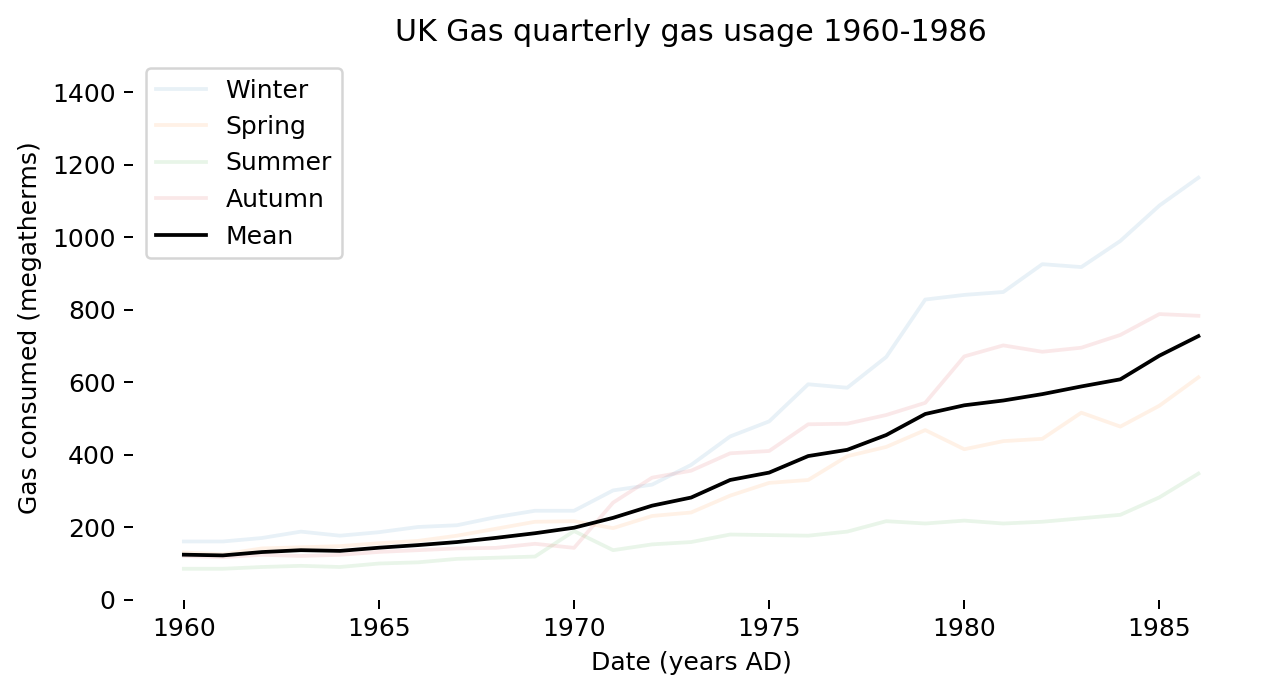

In [74]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(q1[:,1], q1[:,2], label='Winter', color='C0', alpha=0.1)
ax.plot(q1[:,1], q2[:,2], label='Spring', color='C1', alpha=0.1)
ax.plot(q1[:,1], q3[:,2], label='Summer', color='C2', alpha=0.1)
ax.plot(q1[:,1], q4[:,2], label='Autumn', color='C3', alpha=0.1)

ax.plot(q1[:,1], (q1[:,2]+q2[:,2]+q3[:,2]+q4[:,2])/4, label='Mean', color='k', alpha=1.0)

ax.set_xlabel('Date (years AD)')
ax.set_ylabel('Gas consumed (megatherms)')
ax.legend()
ax.set_frame_on(False)
ax.set_ylim(0,1500)
ax.set_title("UK Gas quarterly gas usage 1960-1986")
ax.legend()

---

# Coords
So far, we have assumed a simple model for coordinate systems (**coords**). We have just mapped two dimensions onto a two dimensional image with some scaling. More precisely, we have assumed that the mapping from data to visual units is linear mapping of each independent data dimension $x$ and $y$ to a Cartesian coordinate frame defined by a set of **axis limits**.

An axis limit specifies a range in **data units** (e.g. 0 to 500 megatherms) which are then mapped onto the available space in the figure in **visual units** (e.g. 8cm or 800px).

In `matplotlib` for example, we can control the visual units of a figure using `figsize` when creating a figure (which, by default, are in inches).

The axes will span some portion of that figure, and these define the **coord** for the visualisation. The axis limit `ax.set_xlim()` and `ax.set_ylim()` commands specify the data unit range which is mapped on. 

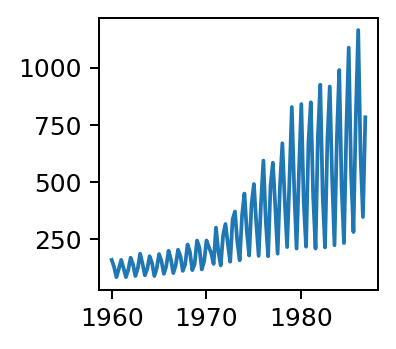

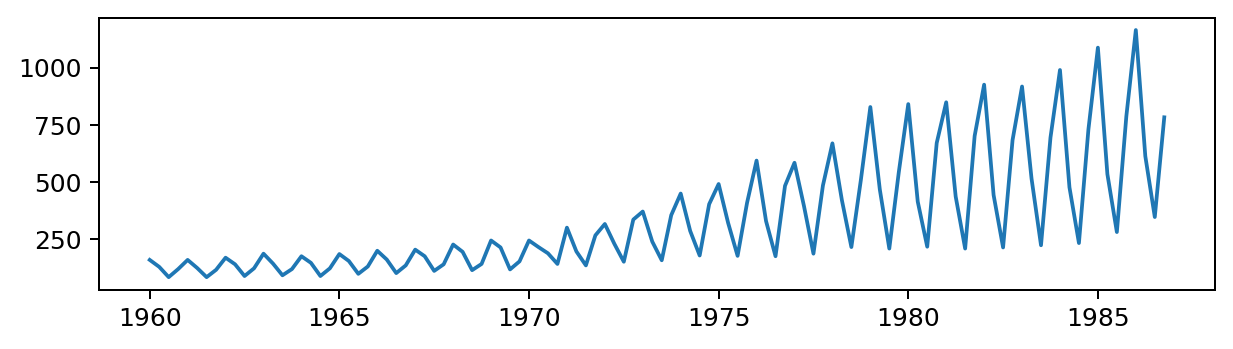

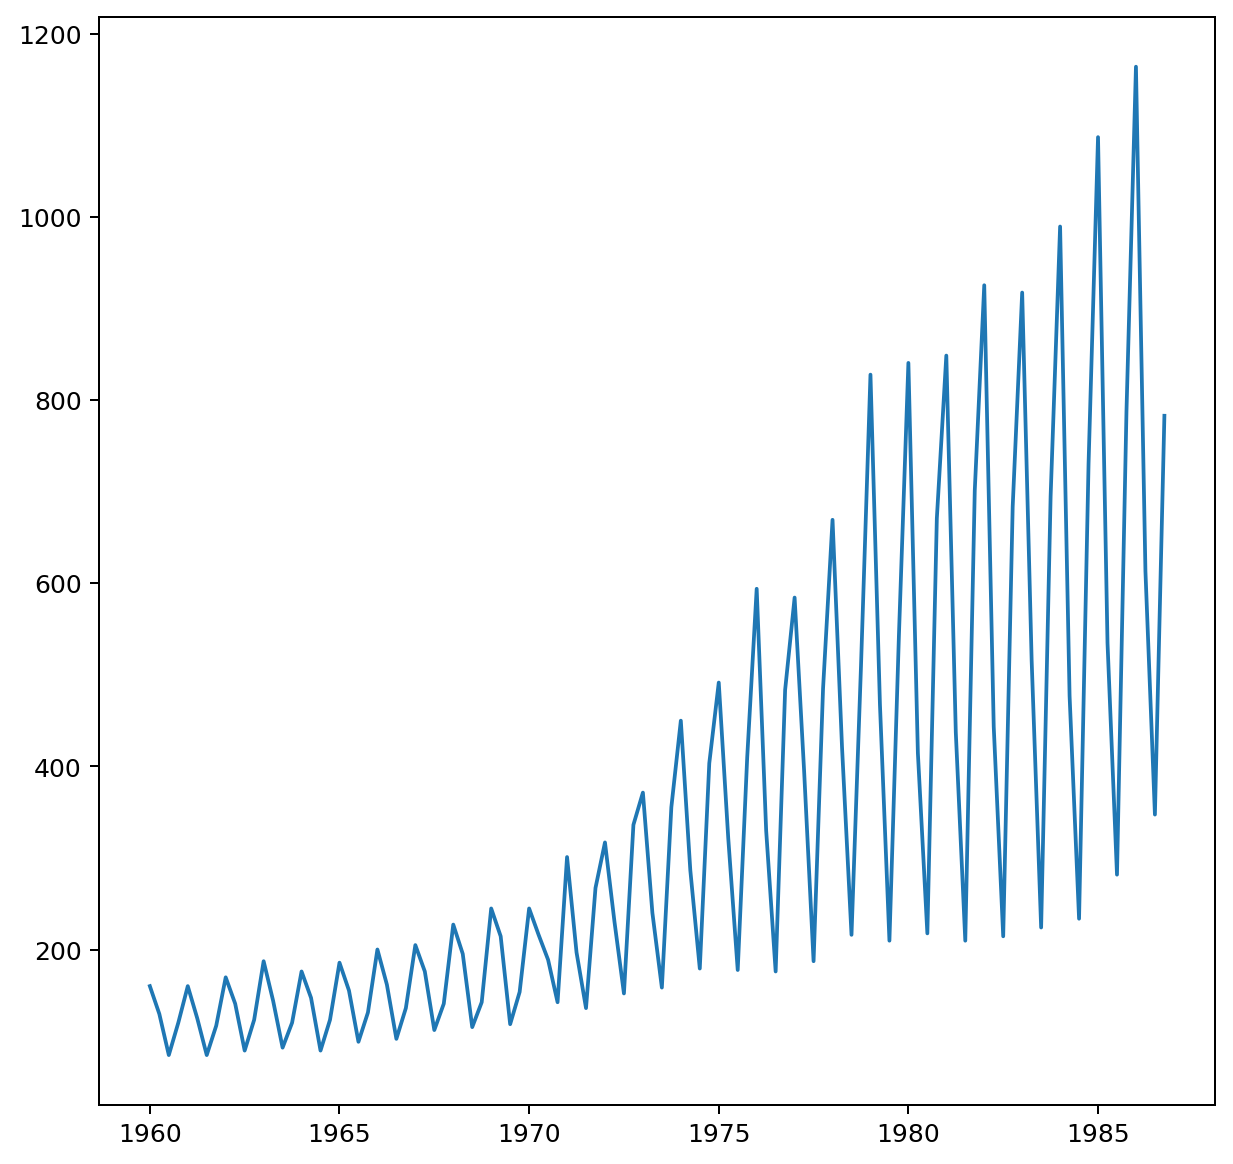

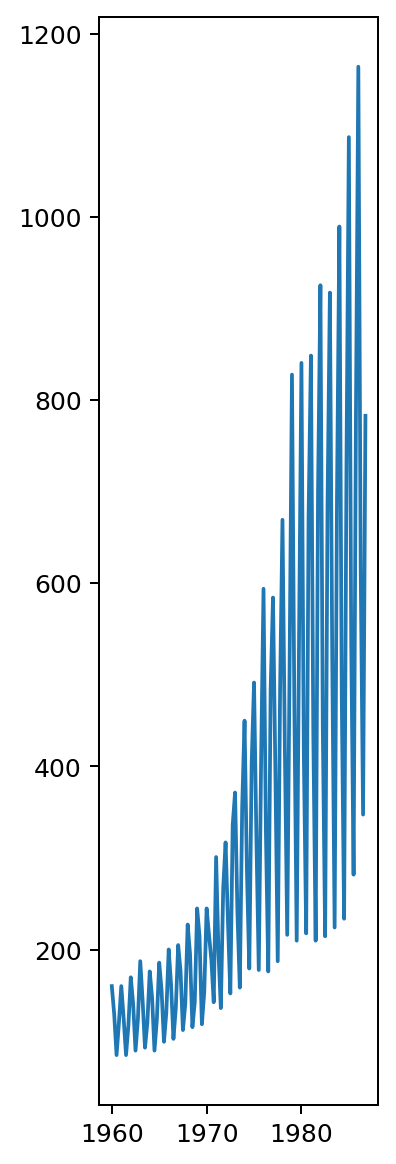

In [75]:
# different visual units, same data units
small_square_fig = plt.figure(figsize=(2,2))
small_long_fig = plt.figure(figsize=(8,2))
large_square_fig = plt.figure(figsize=(8,8))
large_long_fig = plt.figure(figsize=(2,8))

ax = small_square_fig.add_subplot(1,1,1)
ax.plot(gas[:,1], gas[:,2])

ax = small_long_fig.add_subplot(1,1,1)
ax.plot(gas[:,1], gas[:,2])

ax = large_square_fig.add_subplot(1,1,1)
ax.plot(gas[:,1], gas[:,2])

ax = large_long_fig.add_subplot(1,1,1)
ax.plot(gas[:,1], gas[:,2])


(500, 600)

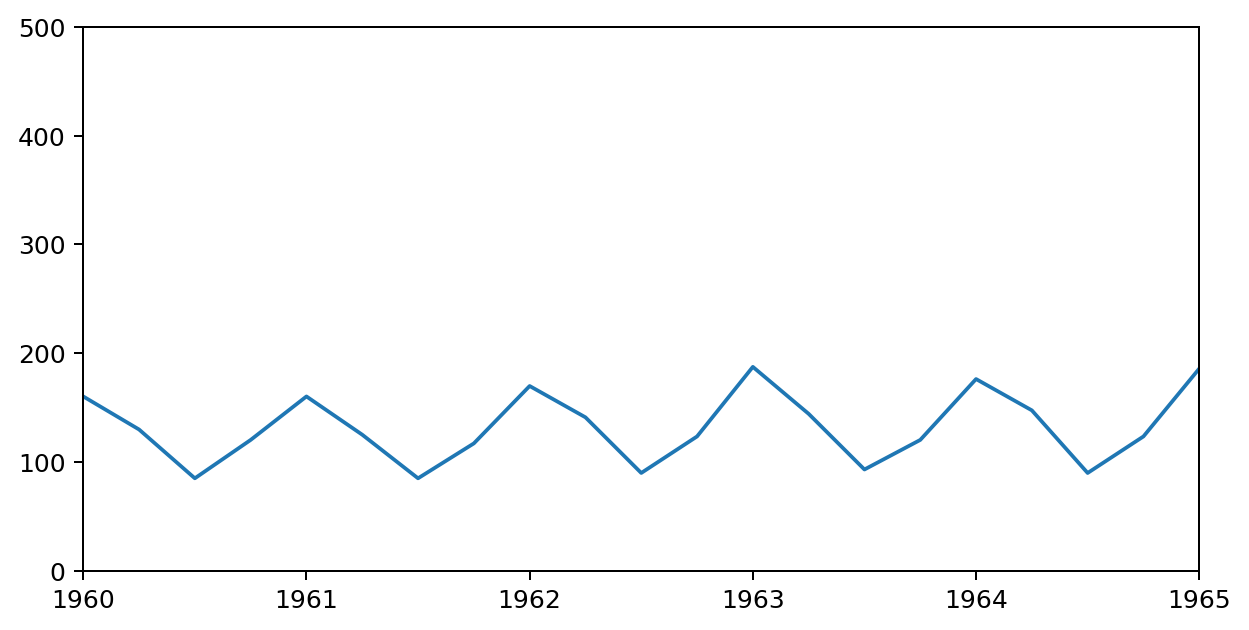

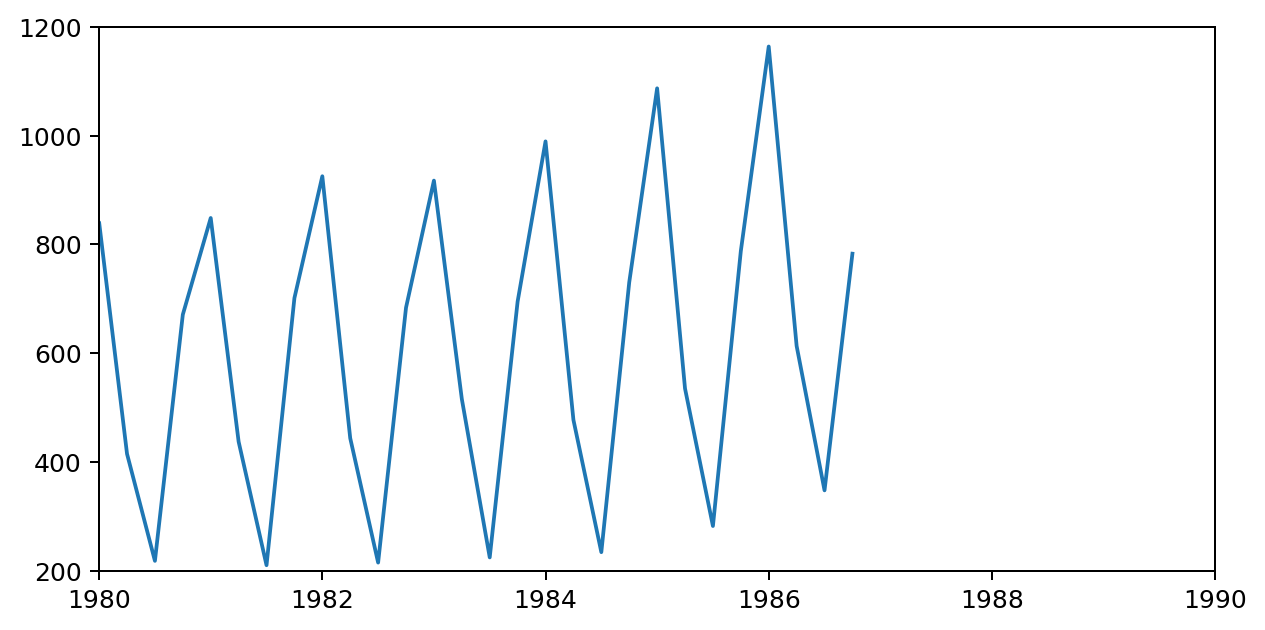

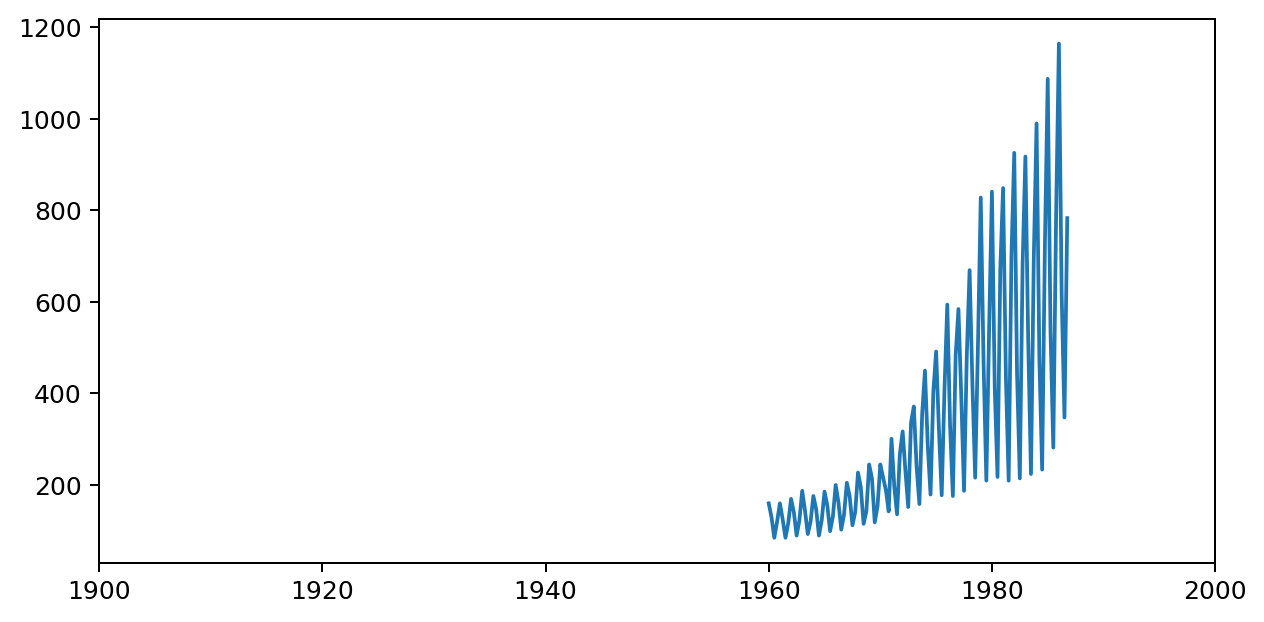

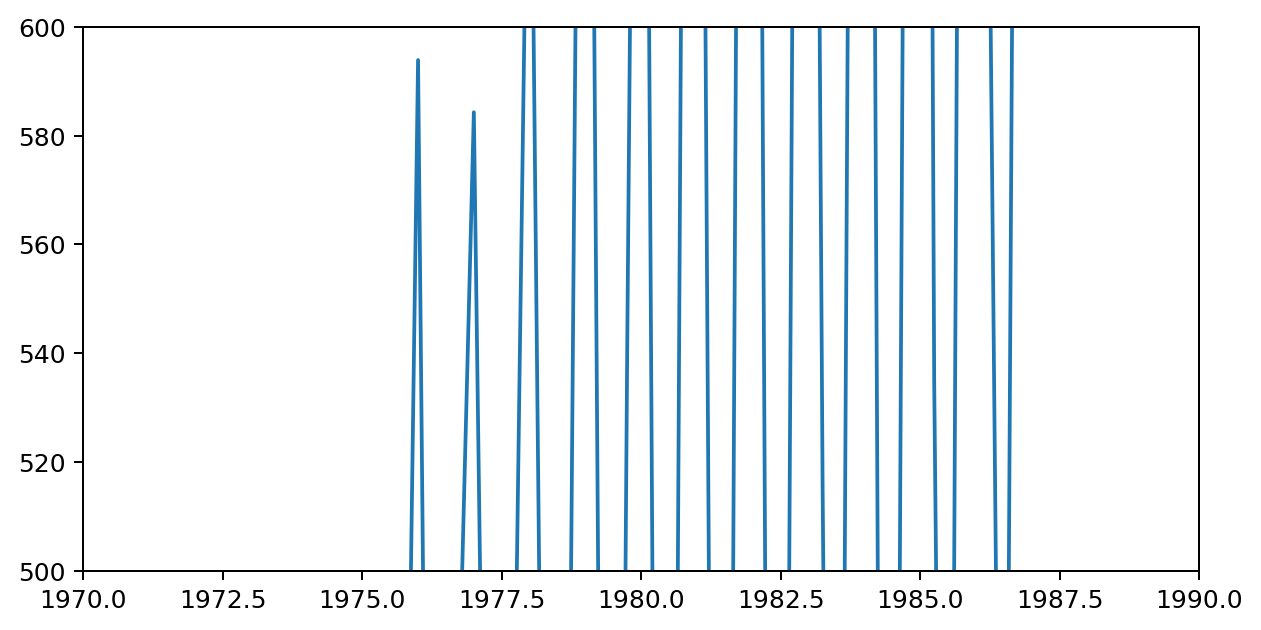

In [76]:
# same figure size, different axis limits
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gas[:,1], gas[:,2])
ax.set_ylim(0,500)
ax.set_xlim(1960, 1965)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gas[:,1], gas[:,2])
ax.set_ylim(200,1200)
ax.set_xlim(1980, 1990)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gas[:,1], gas[:,2])
ax.set_xlim(1900, 2000)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gas[:,1], gas[:,2])
ax.set_xlim(1970, 1990)
ax.set_ylim(500,600)


## Aspect ratio

In some cases, the **aspect ratio** of a visualisation is important. For example, images should never be stretched or squashed when displayed. In the left plot below, the shape is circular but appears elliptical:


Text(0.5, 1.0, 'Forced oblate aspect circle')

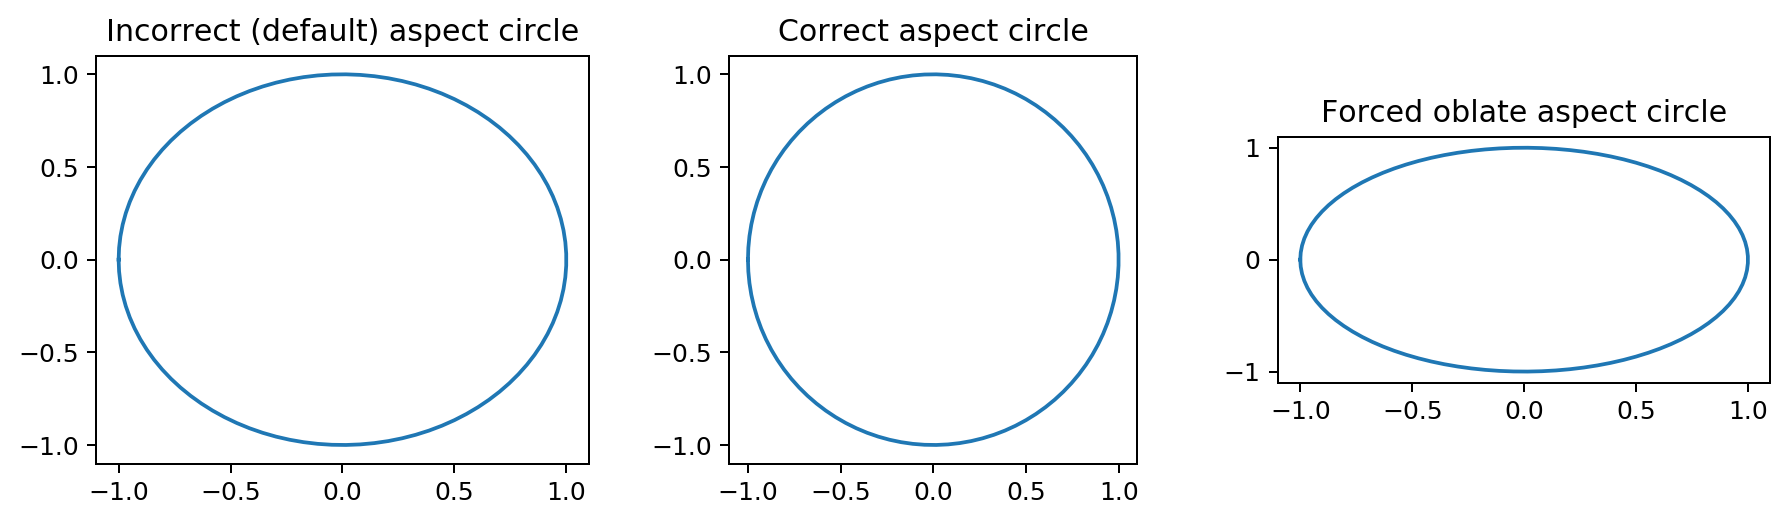

In [77]:
# this is definitely circular!
angle = np.linspace(-np.pi, np.pi, 100)
x, y = np.cos(angle), -np.sin(angle)


fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(1,3,1)
ax.plot(x,y)
ax.set_title("Incorrect (default) aspect circle")

# correct the aspect ratio to 1:1
ax = fig.add_subplot(1,3,2)
ax.plot(x,y)
ax.set_aspect(1.0) # 1.0 means height = 1 x width
ax.set_title("Correct aspect circle")

# force the aspect ratio to 2:1
ax = fig.add_subplot(1,3,3)
ax.plot(x,y)
ax.set_aspect(0.5) 
ax.set_title("Forced oblate aspect circle")

The aspect ratio of the **coord**  will  by default be defined by the size of the figure, and the portion of the figure dedicated to a subplot. It can be manually adjusted using `set_aspect()` to force the visual units to span equal data units.

### Coords in general
A coordinate system encompasses a **projection** onto the 2D plane, and might include transformations like polar coordinates, logarithmic coordinates or 3D perspective projection. We have so far seen only linear Cartesian coordinates, which are very simple projections. But there are other projections which can be useful to reveal structure in certain kinds of datasets.

### Log scales
Sometimes a linear scale is not an effective way to display data. This is particularly true when datasets have very large spans of magnitude. In this case, a **logarithmic** coordinate system can be used.

Log scales can be used either on the $x$-axis, $y$-axis or both, depending on which variable(s) have the large magnitude span.
If the plot is log in $y$ only, the plot is called "semilog $y$"; if $x$ only, "semilog $x$" and if logarithmic on both axes "log-log".

In `matplotlib`, `set_xscale`/`set_yscale` can be used to change between linear and log scales on each axis. (side note: there are also commands `semilogx`, `semilogy` and `loglog` which are just aliases for `plot` with the appropriate scale change).



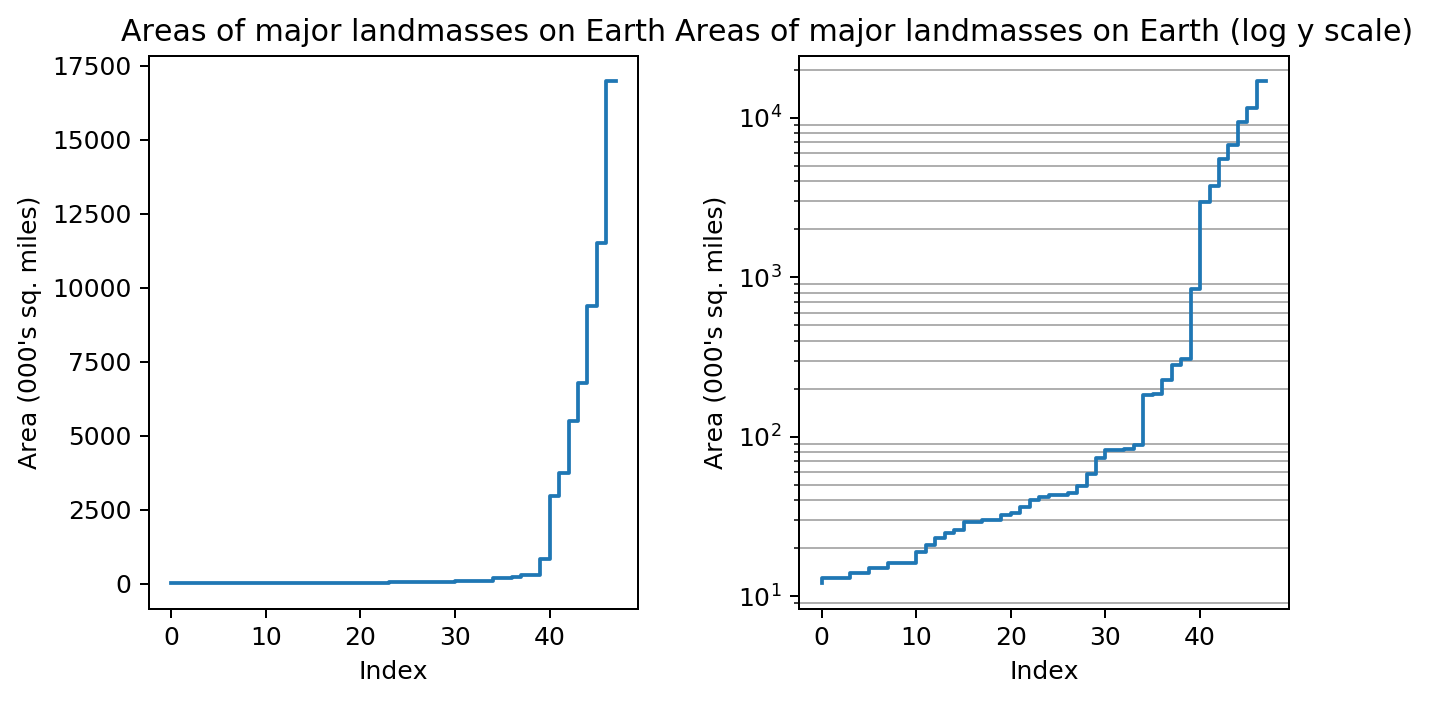

In [78]:
# what should we call a continent? 
islands = np.loadtxt("data/islands.txt")

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 2, 1)
ax.step(np.arange(len(islands)), np.sort(islands))
ax.set_xlabel("Index")
ax.set_ylabel("Area (000's sq. miles)")
ax.set_title("Areas of major landmasses on Earth")

ax = fig.add_subplot(1, 2, 2)
ax.step(np.arange(len(islands)), np.sort(islands))
ax.set_xlabel("Index")
ax.set_ylabel("Area (000's sq. miles)")
ax.set_title("Areas of major landmasses on Earth (log y scale)")
ax.set_yscale("log")
ax.grid(True, which="minor")

fig.tight_layout()  # fix overlap

<function numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)>

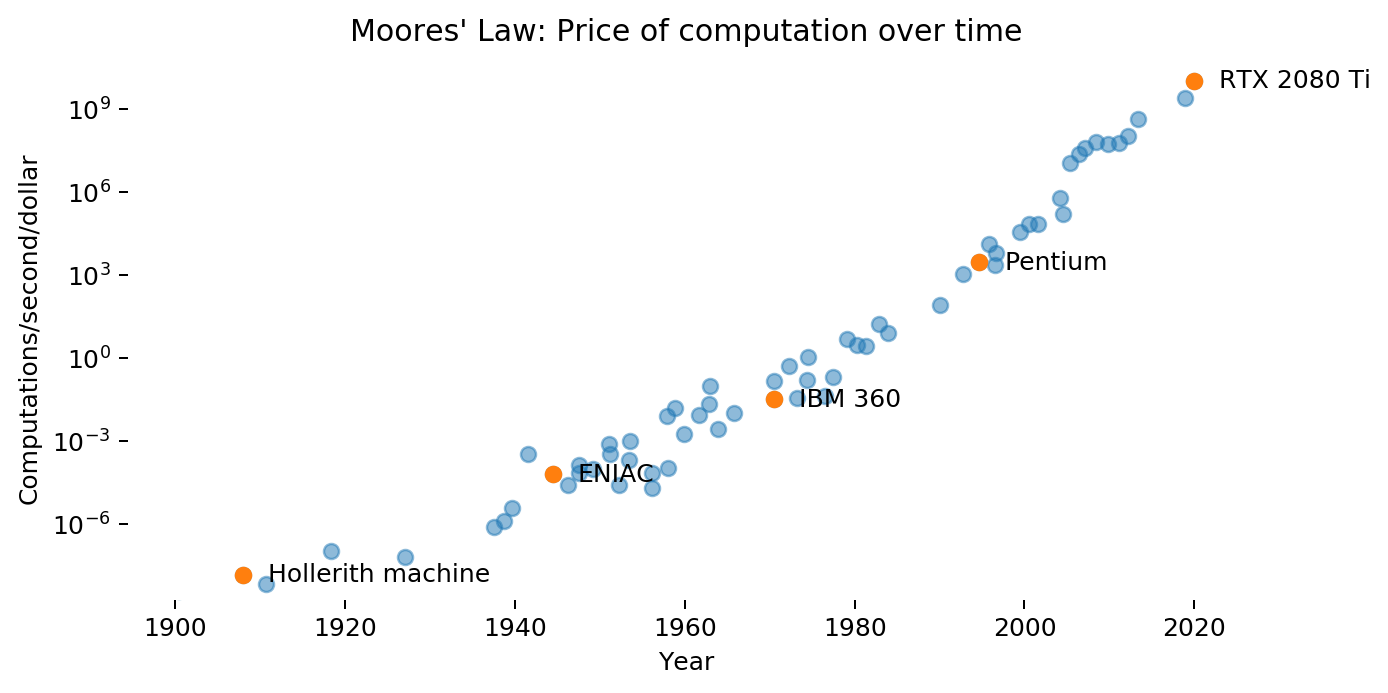

In [81]:
moores = np.loadtxt("data/moores.csv", delimiter=',')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(moores[:,0], moores[:,1], alpha=0.5)
#ax.set_ylim(1e-10, 1e10)
ax.set_yscale('log')
ax.set_xlabel("Year")
ax.set_ylabel("Computations/second/dollar")
ax.set_title("Moores' Law: Price of computation over time")

def annotate(point, label):
    ax.annotate(xy=(moores[point,0], moores[point,1]), s=label, xytext=(10,-3), textcoords='offset points')
    ax.plot(moores[point,0], moores[point,1], 'o', color='C1')

annotate(-1, "RTX 2080 Ti")
annotate(-19, "Pentium")
annotate(-34, "IBM 360")
annotate(-55, "ENIAC")
annotate(1, "Hollerith machine")
ax.set_frame_on(False)
np.logspace

#### Polynomial or power-law relationships
Log-log scales (log on both $x$ and $y$ axes) are useful when there is a (suspected) polynomial relationship between variables (e.g. $y=x^2$ or $y=x^\frac{1}{3}$). The relationship will appear as a straight line on a log-log plot. 

$$ f(x) = x^k $$

looks linear if plot on `loglog`. The gradient of the line tells you the value of `k`.

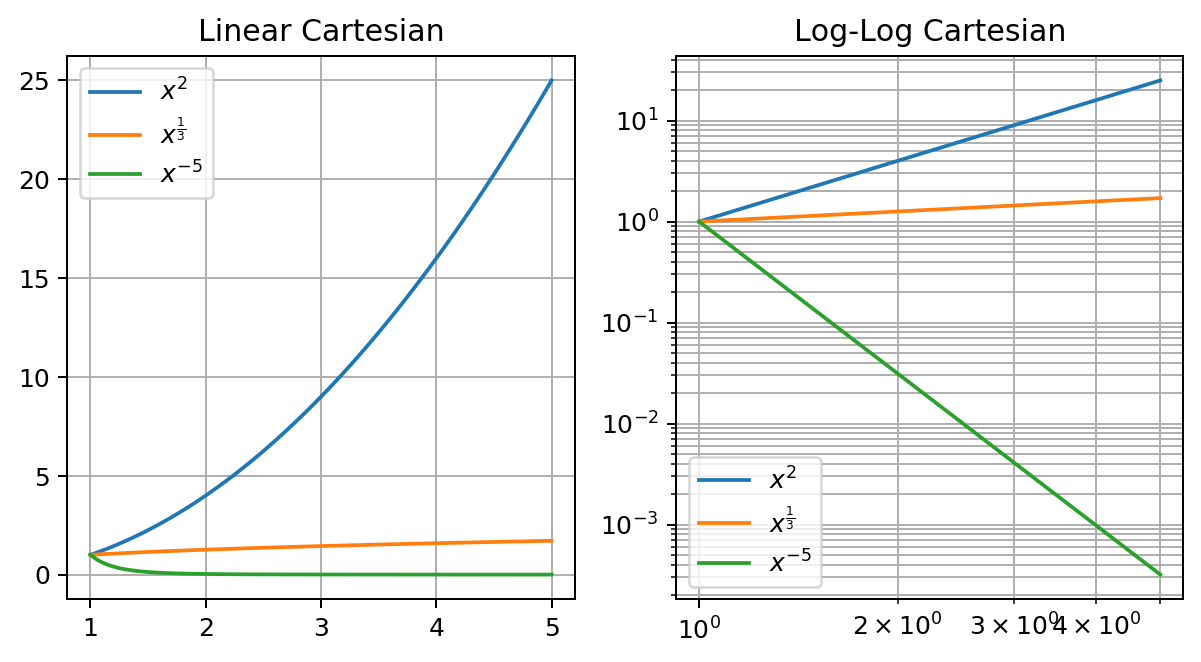

In [82]:
x = np.linspace(1.0, 5, 100)
y1 = x ** 2  # k = 2
y2 = x ** (1 / 3.0)  # k = 1/3
y3 = x ** (-5.0)  # k = -5

# left: linear-linear plot
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x, y1, label="$x^2$")
ax.plot(x, y2, label="$x^\\frac{1}{3}$")
ax.plot(x, y3, label="$x^{-5}$")
ax.set_title("Linear Cartesian")
ax.grid(True, which="both")
ax.legend()

# right: log-log plot
ax = fig.add_subplot(1, 2, 2)
ax.plot(x, y1, label="$x^2$")
ax.plot(x, y2, label="$x^\\frac{1}{3}$")
ax.plot(x, y3, label="$x^{-5}$")
ax.set_title("Log-Log Cartesian")
ax.set_yscale("log")
ax.set_xscale("log")
ax.grid(True, which="both")
ax.legend()

#### Negative numbers
Note that log scales have one downside: the log of a negative number is undefined, and in fact the logarithm diverges to -infinity at 0.

In [83]:
print(np.log(-1))
print(np.log(0))

nan
-inf


c:\local\conda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
c:\local\conda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


This means that signed data cannot easily be plotted on a log scale (at least if the sign is meaningful and can't just be shifted to a positive number by adding on a constant). 

Text(0.5, 1.0, 'Linear plot of cos(x)*tan(x/2)*exp(x)')

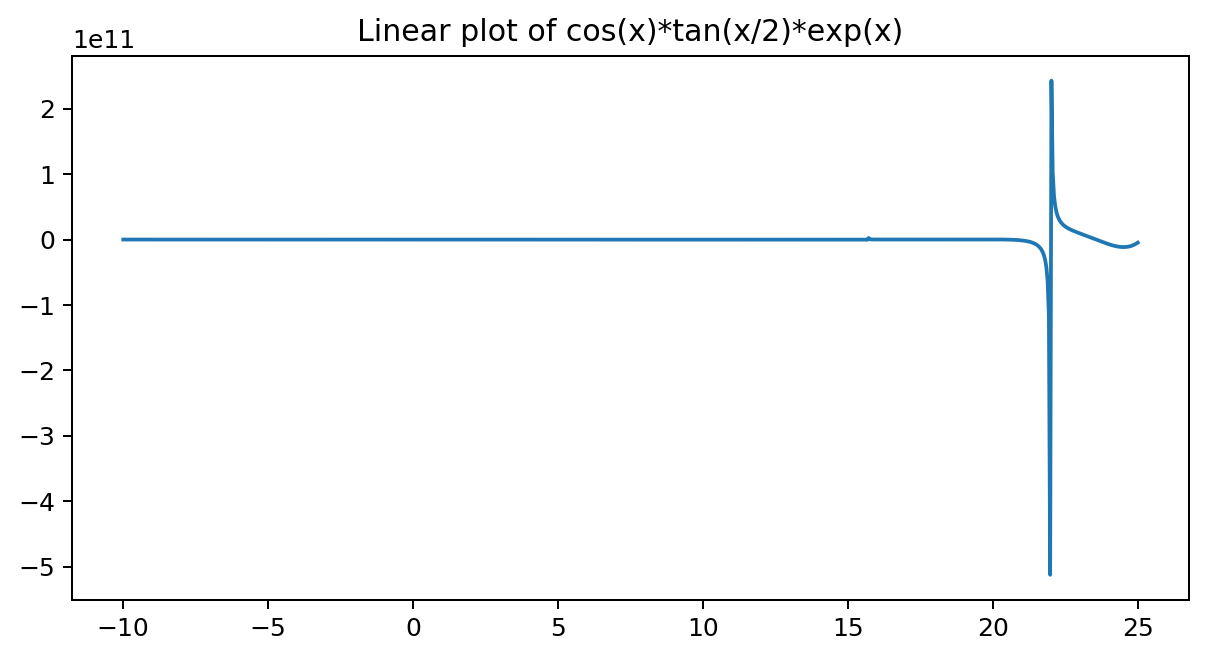

In [83]:
x = np.linspace(-10, 25, 800)
# tricky function that has a very large change in magnitude
y = np.cos(x) * np.tan(x * 0.5) * np.exp(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y)
ax.set_title("Linear plot of cos(x)*tan(x/2)*exp(x)")

Text(0.5, 1.0, 'semi log y plot of cos(x)*tan(x/2)*exp(x)')

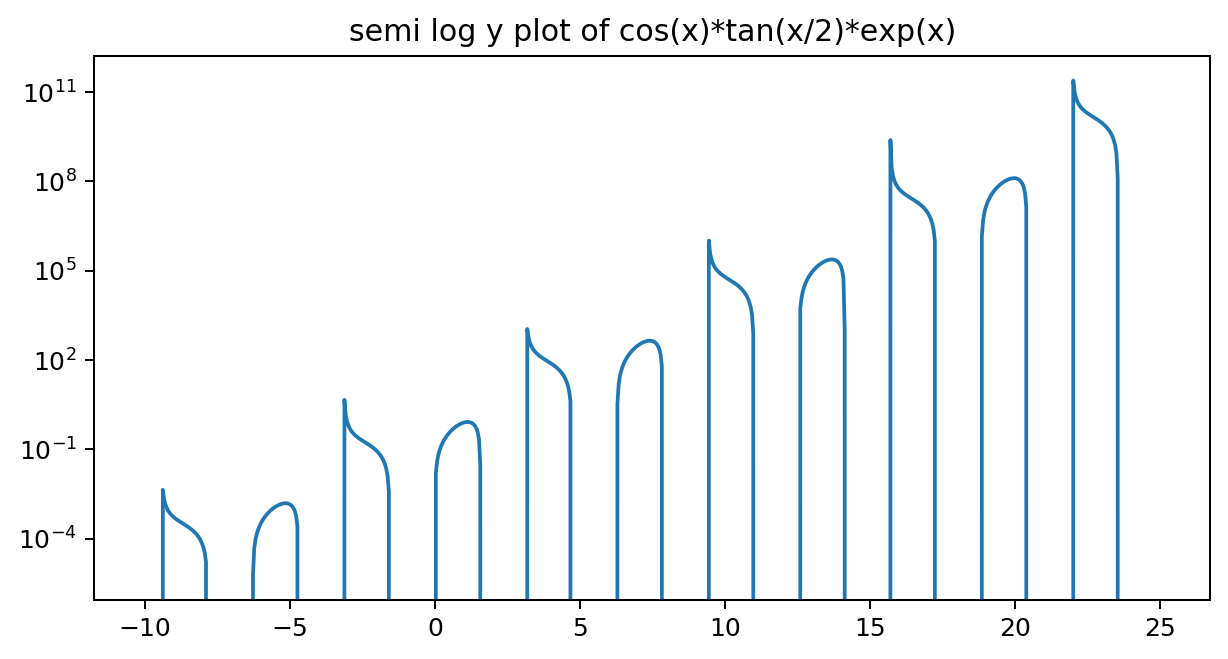

In [84]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y)
# just cuts off the portion below 0, which isn't very helpful
ax.set_yscale("log")
ax.set_title("semi log y plot of cos(x)*tan(x/2)*exp(x)")

There are modified log scales that "cut out" a small region around 0, and then plot `log(abs(x)) * sign(x)` -- the symmetric logarithm or `symlog`. The "cut out" region is plotted as linear in that range. This distort the plot slightly, but is usually acceptable.

Text(0.5, 1.0, 'symlog plot of $\\cos(x)*\\tan(x/2)*\\exp(x)$')

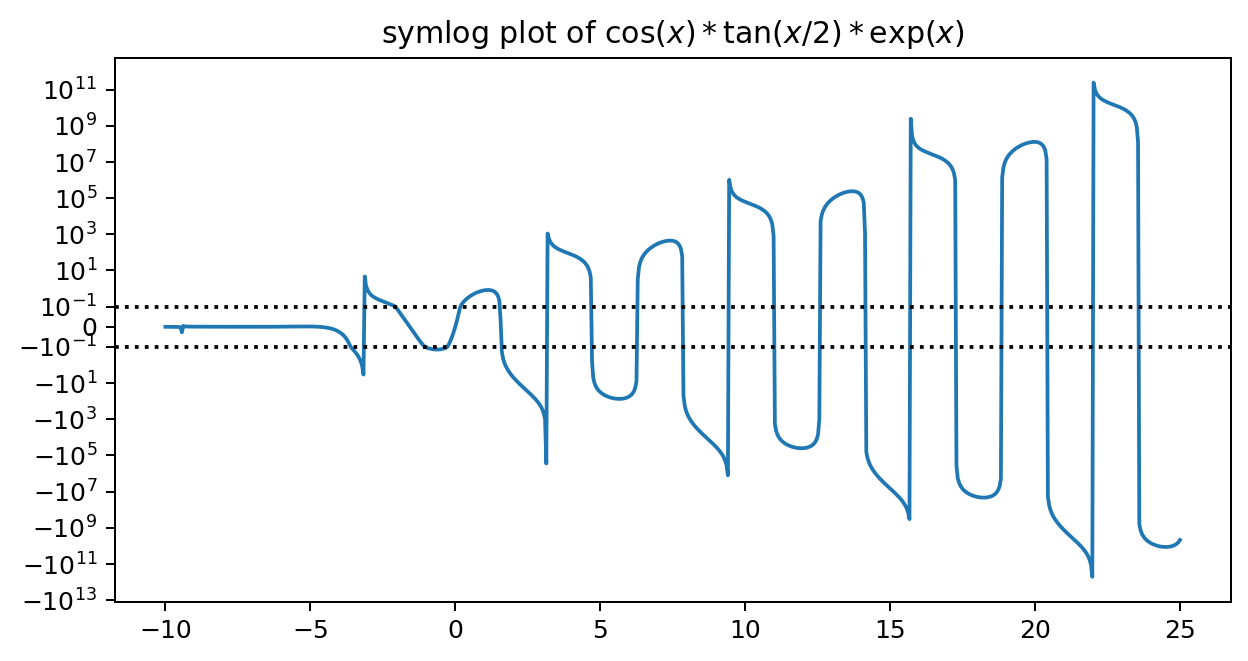

In [85]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x,y)
# mark the linear region on the plot
ax.axhline(0.1, color='k', ls=':')
ax.axhline(-0.1, color='k', ls=':')
# this will plot the scale linear between -0.1 and 0.1, and as log(abs(x)) * sign(x) everywhere else
ax.set_yscale("symlog", linthreshy=0.1)
ax.set_title("symlog plot of $\cos(x)*\\tan(x/2)*\exp(x)$")

### Polar
Cartesian plots are the most familiar coords. But some data is naturally represented in different mappings. The most notable of these is **polar coordinates**, in which two values are mapped onto an *angle* $\theta$ and a *radius* $r$. 

This most widely used for data that originated from an angular measurement, but it can be used any time it makes sense for one of the axes to "wrap around" smoothly. The classic example is *radar data* obtained from a spinning dish, giving the reflection distance at each angle of the dish rotation. Similarly, wind data from weather stations typically records the direction and speed of the strongest gusts.

<img src="imgs/radar.jpg"> *[[Image](https://flickr.com/photos/24931020@N02/16096731164 "Radar") by [Ozzy Delaney](https://flickr.com/people/24931020@N02) license [CC BY](https://creativecommons.org/licenses/by/2.0/)]*








Text(0, 0.5, 'Speed (mph)')

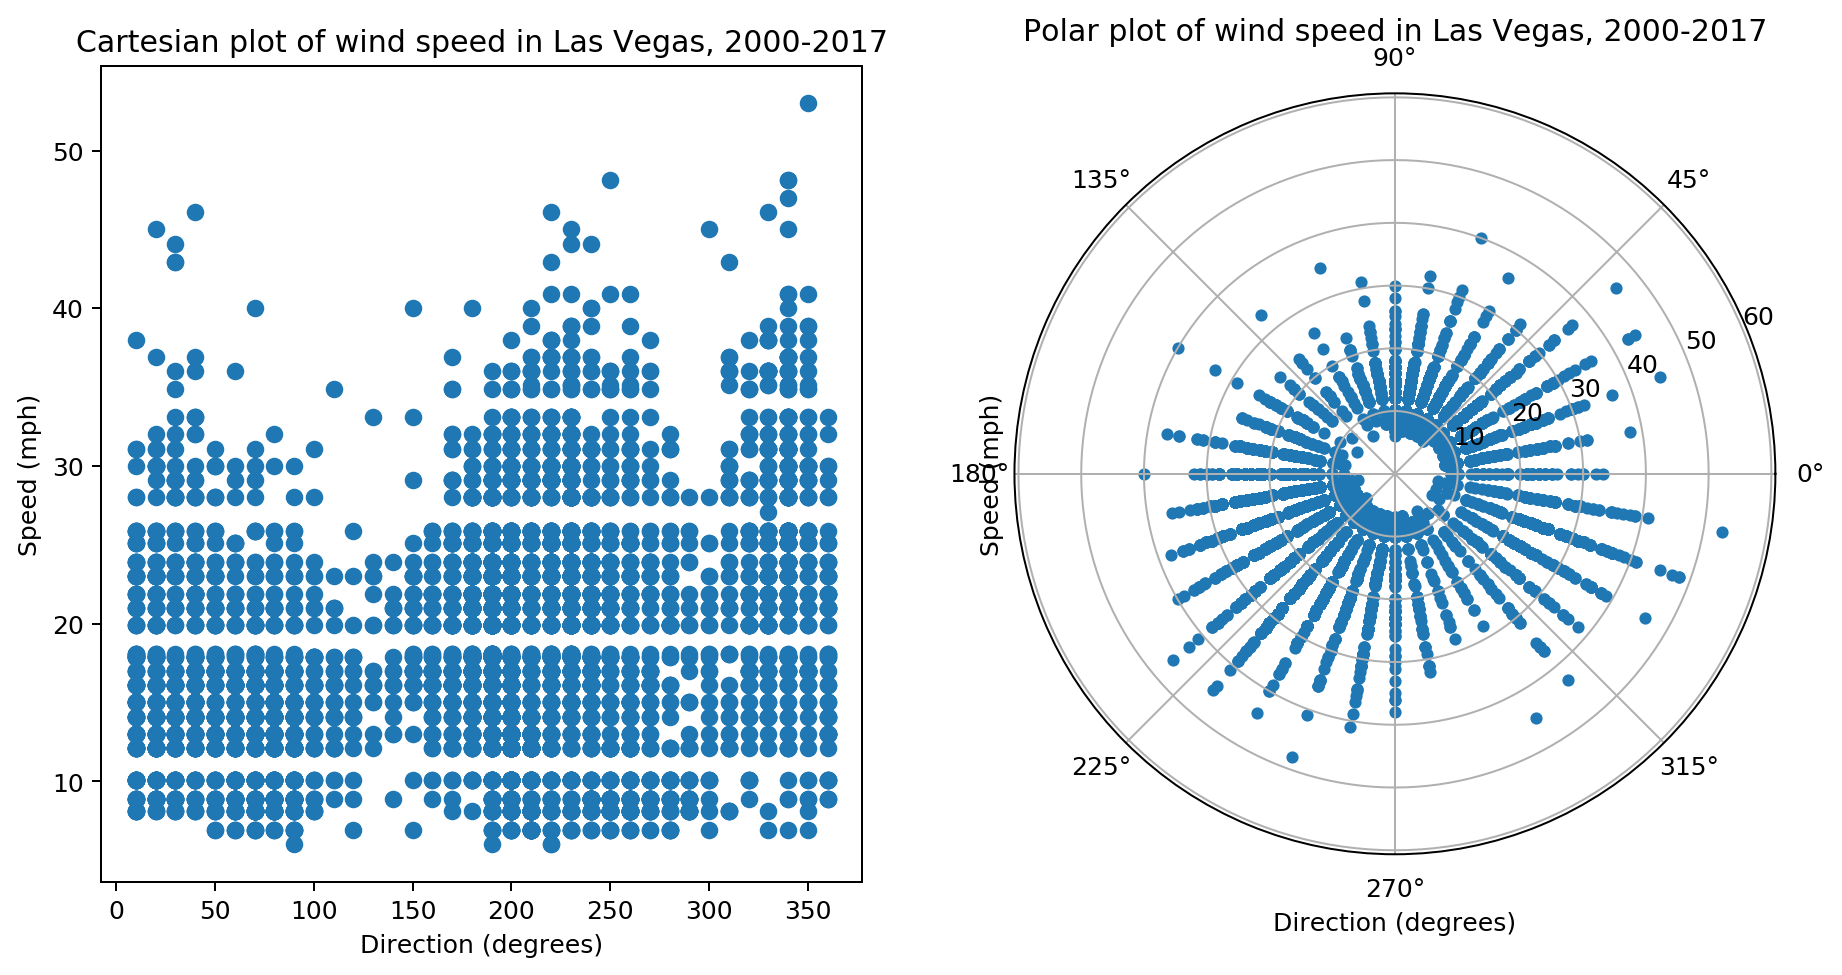

In [86]:
las_vegas = np.loadtxt("data/las_vegas_wind_2000_to_2017.csv", delimiter=',')
direction = las_vegas[:,0]
speed = las_vegas[:,1]

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1)
ax.scatter(direction, speed)
ax.set_title("Cartesian plot of wind speed in Las Vegas, 2000-2017")
ax.set_xlabel("Direction (degrees)")
ax.set_ylabel("Speed (mph)")


ax = fig.add_subplot(1,2,2, projection='polar')
ax.scatter(np.radians(direction), speed, s=15)
ax.set_title("Polar plot of wind speed in Las Vegas, 2000-2017")
ax.set_xlabel("Direction (degrees)")
ax.set_ylabel("Speed (mph)")



#### Negative numbers (again)
The sign issue raises it head again with polar plots -- there isn't a natural way to represent radii below zero on a polar plot. In general, polar plots should be reserved for mappings where the data mapping onto $r$ is positive.

---

# Facets and layers

We have seen several examples where multiple **geoms** have been used in a single visualisation. 

There are two ways in which this can be rendered:
* as distinct **layers** superimposed on the same set of **coords**
* as distinct **facets** on separate sets of **coords** (with separate **scales** and **guides**)

<img src="imgs/layered_faceted.svg">


## Layers
Layering is appropriate when two or more views on a dataset are closely related, and the data mapping are in the same units. For example, the historical wheat price data can be shown usefully as a layered plot. A **legend** is an essential **guide** to distinguish the different layers that are present. If multiple layers are used, a legend should (almost) always be present to indicate which **geom** relates to which dataset attribute.


Text(0.5, 1.0, 'Price of wheat and weekly wage of a skilled worker')

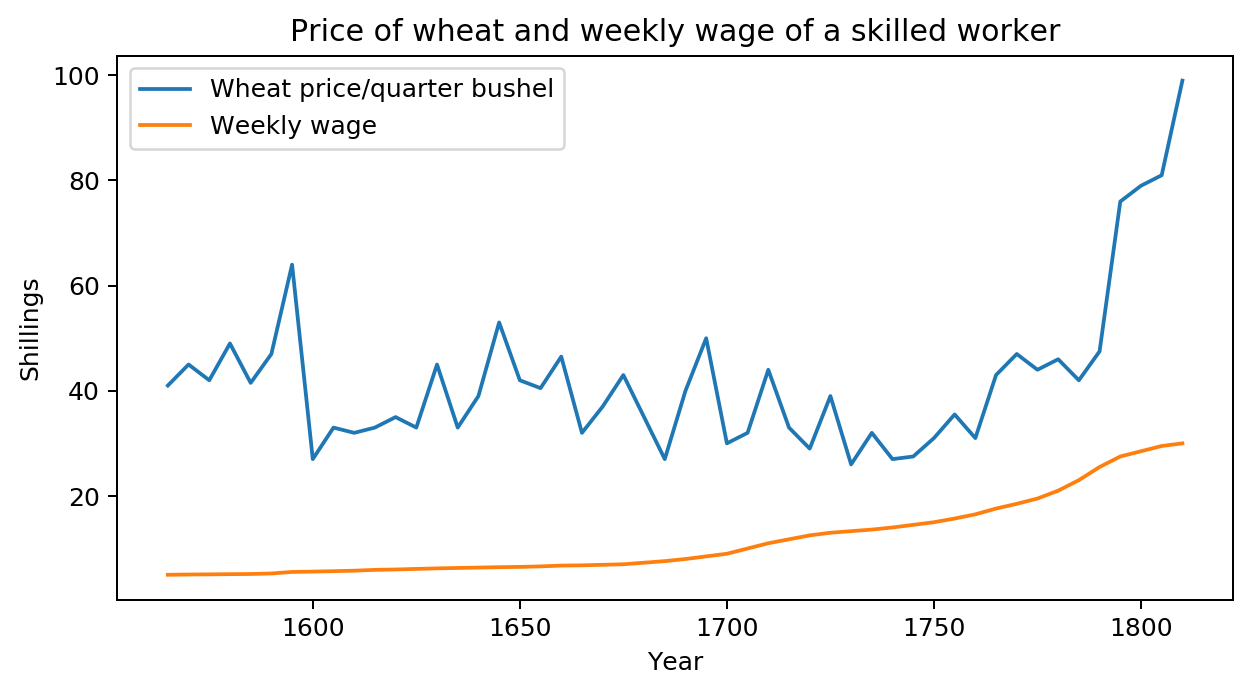

In [87]:
wheat = np.loadtxt("data/Wheat.csv", delimiter=',')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(wheat[:,1], wheat[:,2], label="Wheat price/quarter bushel")
ax.plot(wheat[:,1], wheat[:,3], label="Weekly wage")
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Shillings")
ax.set_title("Price of wheat and weekly wage of a skilled worker")

It would not make any sense to plot the ratio of the wage to the price of wheat on the same graph. The ratio does not have units of shillings, and cannot be overlaid on the same set of **coords**.

Text(0.5, 1.0, '[Bad plot] Price of wheat and weekly wage of a skilled worker')

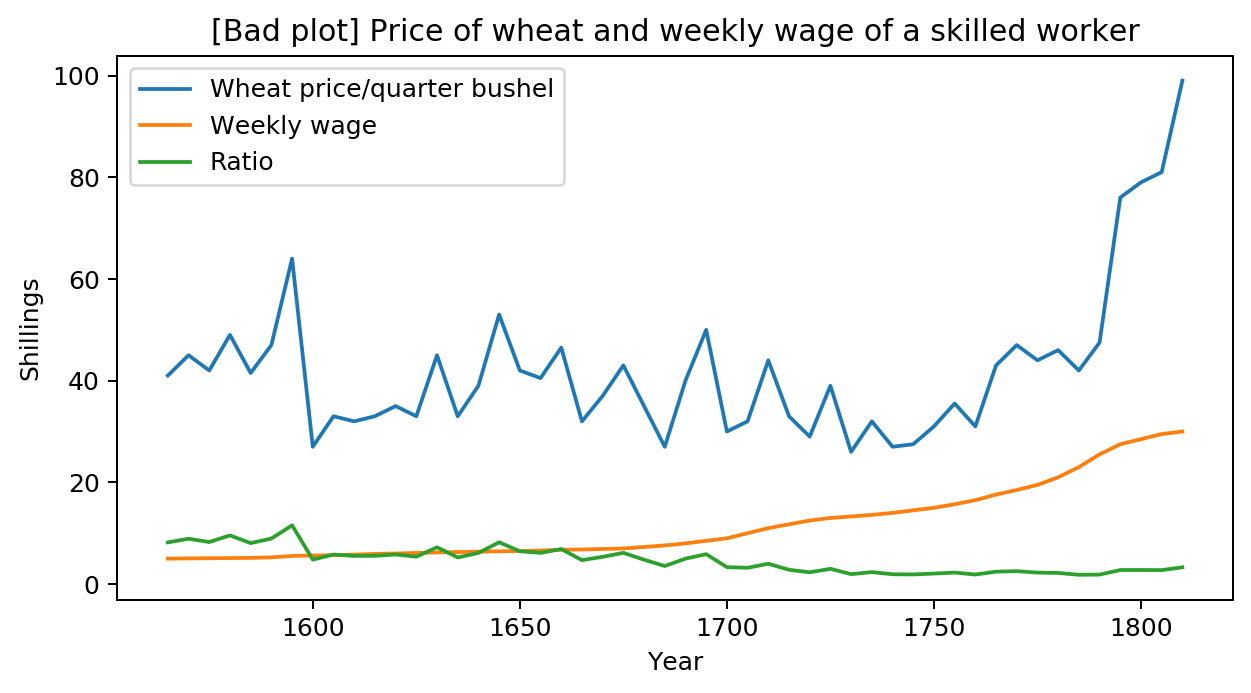

In [88]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(wheat[:,1], wheat[:,2], label="Wheat price/quarter bushel")
ax.plot(wheat[:,1], wheat[:,3], label="Weekly wage")
ax.plot(wheat[:,1], wheat[:,2]/wheat[:,3], label="Ratio")
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Shillings")
ax.set_title("[Bad plot] Price of wheat and weekly wage of a skilled worker")

Occasionally you will see visualisations with **double $y$ axes**. This is a layering which has a common $x$ mapping but uses two different $y$ mappings -- two (slightly) different **coords** layered over each other. This style of visualisation should be avoided, as it can be difficult to interpret and mislead the reader.

Text(0.5, 1.0, '[Bad-ish plot] Price of wheat and weekly wage of a skilled worker')

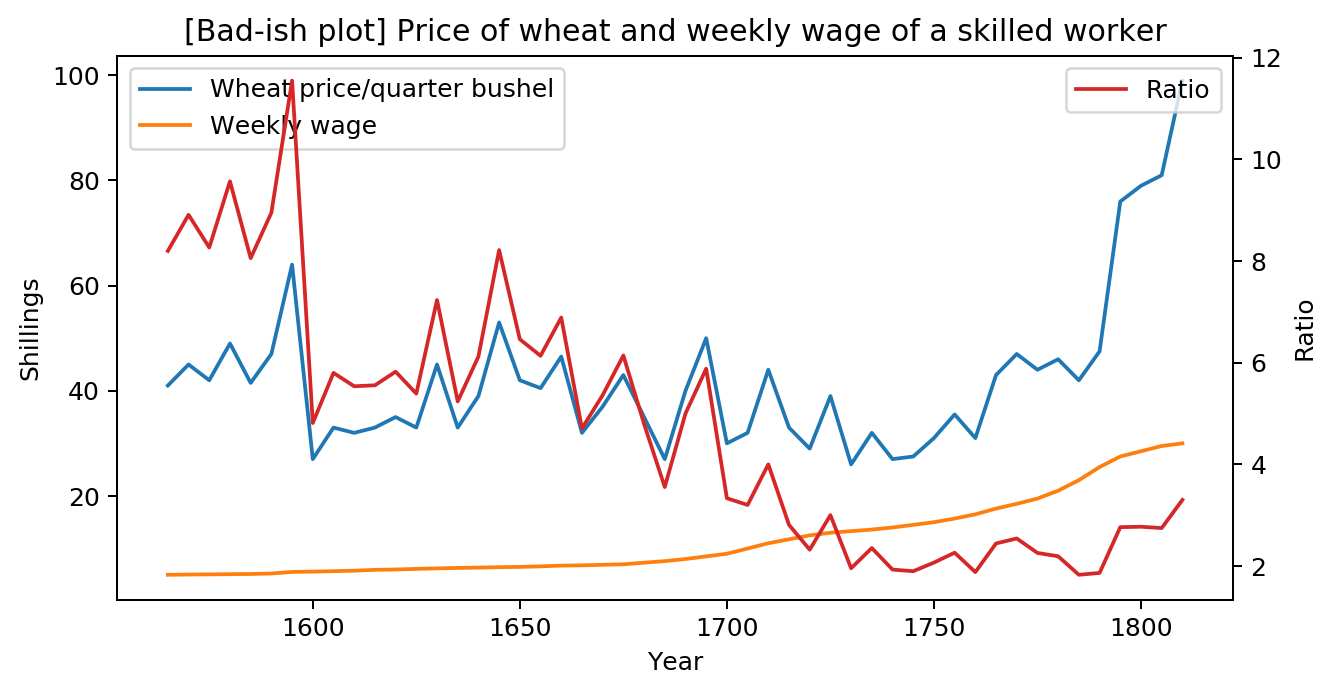

In [89]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)


ax.plot(wheat[:,1], wheat[:,2], label="Wheat price/quarter bushel")
ax.plot(wheat[:,1], wheat[:,3], label="Weekly wage")
ax2 = ax.twinx()
ax2.plot(wheat[:,1], wheat[:,2]/wheat[:,3], label="Ratio", color='C3')
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Shillings")
ax2.set_ylabel("Ratio")
ax2.legend()
ax.set_title("[Bad-ish plot] Price of wheat and weekly wage of a skilled worker")


## Facets
A much better approach is to use **facets**; separate **coords** to show separate aspects of the dataset. Facets have no need to show the same scaling or range of data. However, if two facets show the same attribute (e.g. two facets showing shillings) they should if possible have the same scaling applied to make comparisons easy.

Text(0, 0.5, 'Ratio')

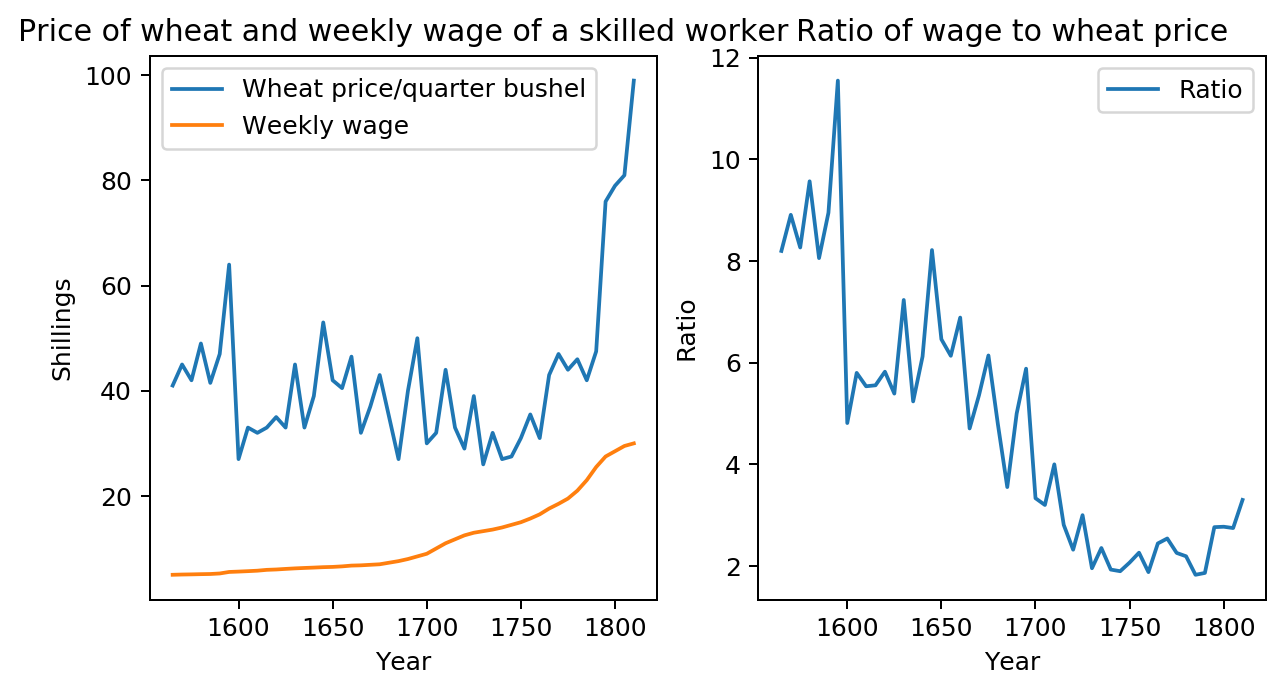

In [90]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.plot(wheat[:,1], wheat[:,2], label="Wheat price/quarter bushel")
ax.plot(wheat[:,1], wheat[:,3], label="Weekly wage")
ax.legend()
ax.set_title("Price of wheat and weekly wage of a skilled worker")
ax.set_xlabel("Year")
ax.set_ylabel("Shillings")


ax = fig.add_subplot(1,2,2)
ax.plot(wheat[:,1], wheat[:,2]/wheat[:,3], label="Ratio")
ax.set_title("Ratio of wage to wheat price")
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Ratio")


Text(0.5, 0.98, "Bad -- don't use different scalings for the same variable in different facets!")

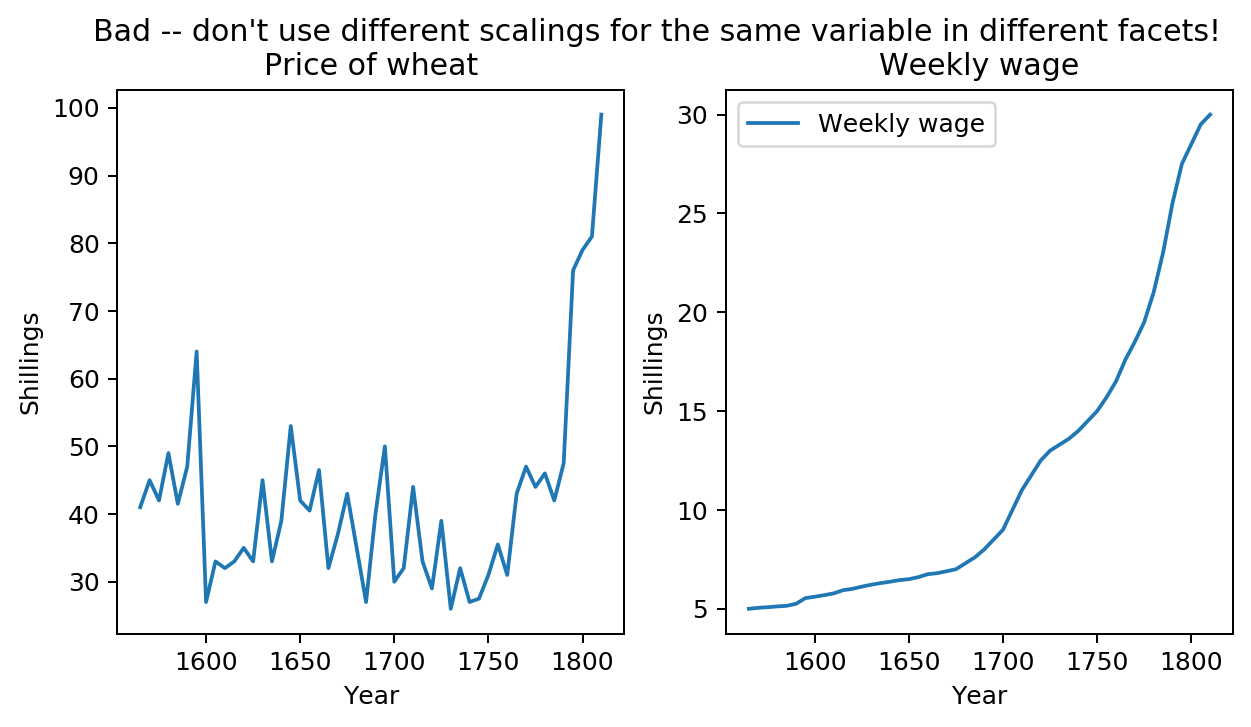

In [91]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.plot(wheat[:,1], wheat[:,2], label="Wheat price/quarter bushel")
ax.set_title("Price of wheat")
ax.set_xlabel("Year")
ax.set_ylabel("Shillings")

ax = fig.add_subplot(1,2,2)
ax.plot(wheat[:,1], wheat[:,3], label="Weekly wage")
ax.legend()
ax.set_title("Weekly wage")
ax.set_xlabel("Year")
ax.set_ylabel("Shillings")

fig.suptitle("Bad -- don't use different scalings for the same variable in different facets!")

### Facet layout
There are many ways to lay out **facets** in a **figure**, but by far the most common is to use a regular grid. This is the notation that `matplotlib` uses in `fig.add_subplot(rows, columns, index)`. Calling this function creates a notional grid of `rows` x `columns` and then returns the axis object (representing a **coord**) to draw in the grid element indexed by `index`. Indices are counted starting from 1, running left to right then bottom to top. 

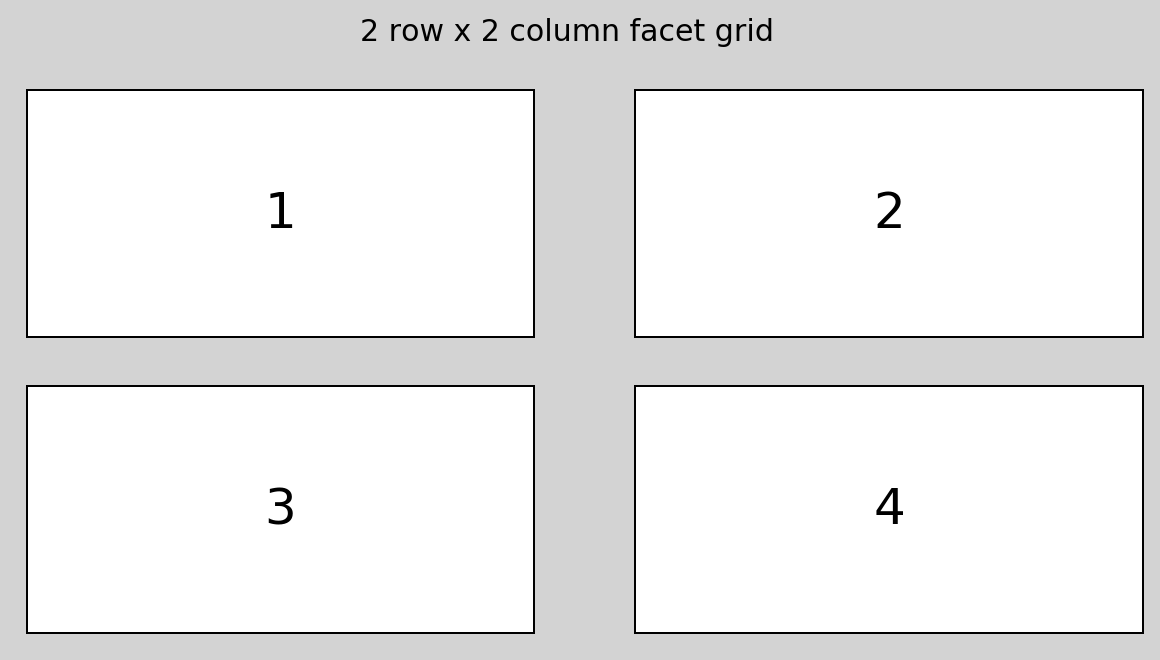

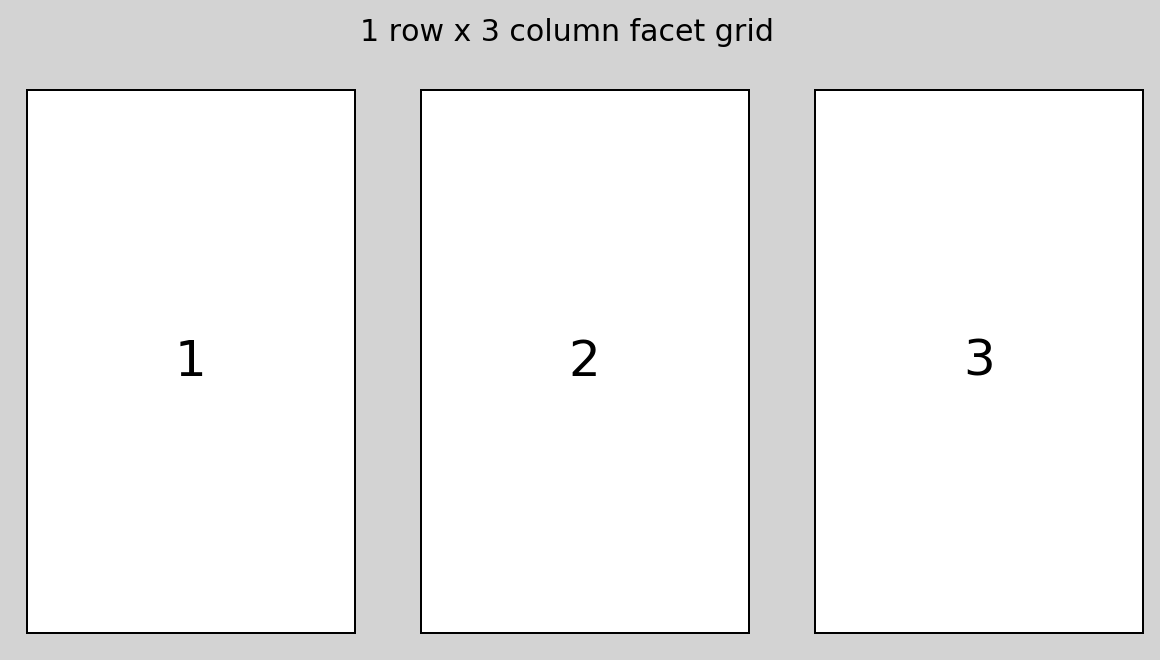

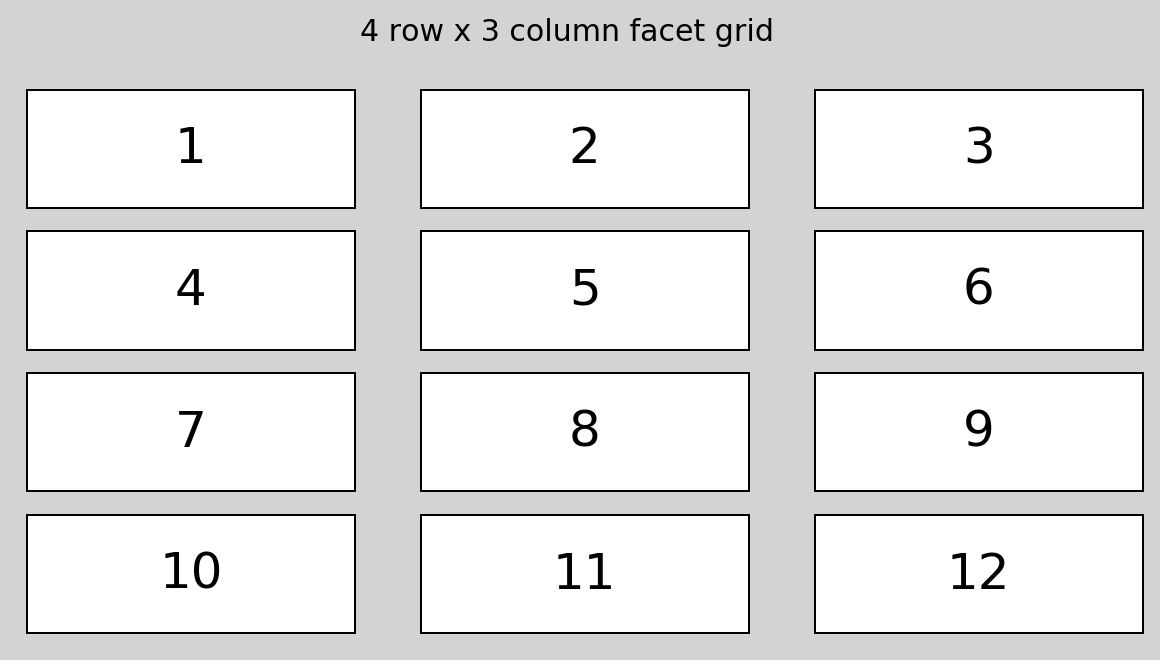

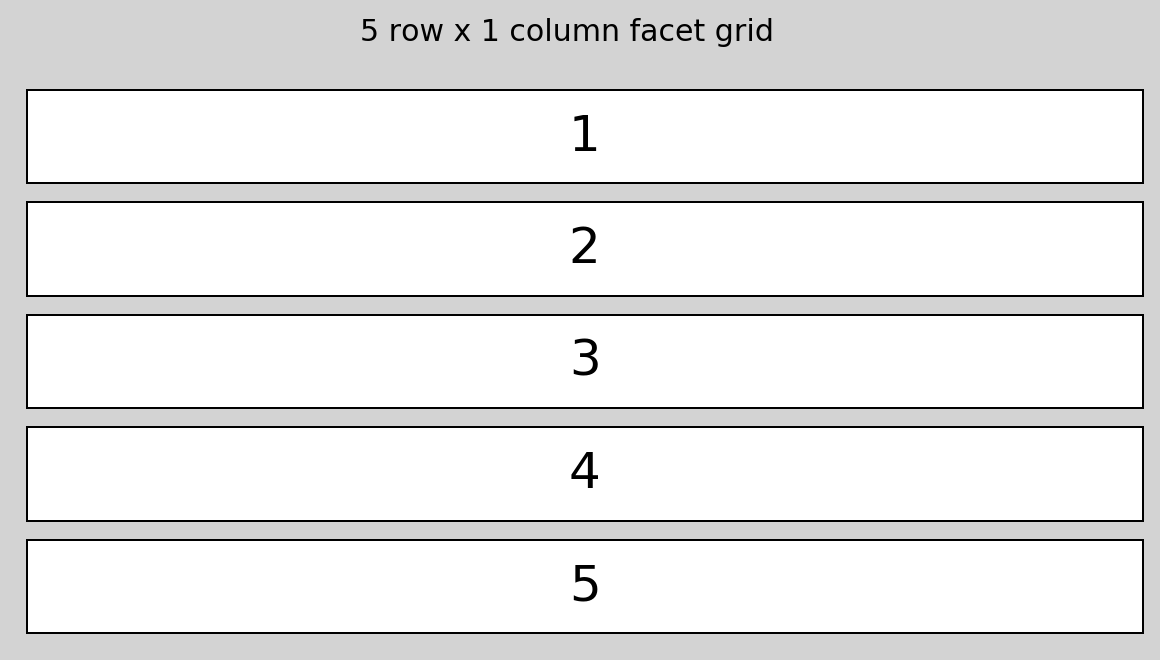

In [92]:
def subplot_test(rows, columns):
    # show the subplot layout and indexing for the given number of rows and columns
    fig = plt.figure(facecolor='lightgray')
    for i in range(rows):
        for j in range(columns):
            index = j+i*columns+1 # indexing starts at 1!
            ax = fig.add_subplot(rows, columns, index)
            # draw a centered label
            ax.text(0.5,0.5,index, fontsize=20, ha='center', va='center')            
            ax.set_xticks([]) 
            ax.set_yticks([]) 
    fig.suptitle("%d row x %d column facet grid" % (rows, columns))
            
subplot_test(2,2)
subplot_test(1,3)
subplot_test(4,3)
subplot_test(5,1)

            

# Communicating Uncertainty
It is critical that scientific visualisations be **honest**; and that means representing **uncertainty** appropriately. Data are often collected from measurements with **observation error**, so the values obtained are corrupted versions of the true values. For example, the reading on a thermometer is not the true temperature of the air.

Other situations may introduce other sources of error; for example, roundoff error in numerical simulations; or uncertainty over the right choice of a mathematical model or its parameters used to model data.

These must be represented so that readers can understand the uncertainty involved and not make judgements unsupported by evidence.

We have already seen the basic tools to represent uncertainty in plots: **stats** like the standard deviation or interquartile range can be used to show summaries of a collection of data.

### Error bars
For example, let's look at the guinea pig data again, this time as a bar chart:

In [93]:
interventions = [0.5, 1.0, 2.0]
plt.figure()
# split into groups and aggregate across groups
vcs = []
ojs = []
for i,interv in enumerate(interventions):
    vcs.append(vc_pigs[(vc_pigs[:,3]==interv),:])
    ojs.append(oj_pigs[(oj_pigs[:,3]==interv),:])
vcs = np.array(vcs)
ojs = np.array(ojs)

<Figure size 1440x720 with 0 Axes>

[Text(0, 0, '0.5mg/day'), Text(0, 0, '1.0mg/day'), Text(0, 0, '2.0mg/day')]

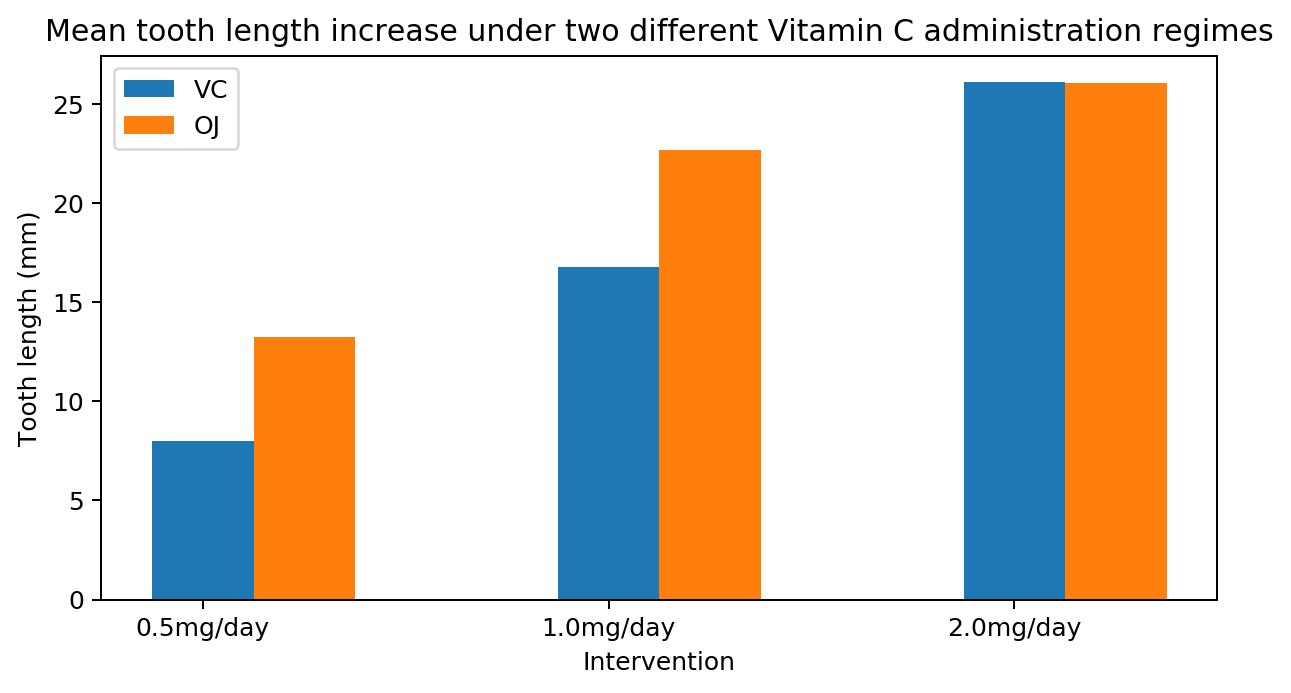

In [94]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.bar(np.arange(len(interventions)), 
       np.mean(vcs,axis=1)[:,1], color='C0', 
       width=0.25, label="VC")

ax.bar(np.arange(len(interventions))+0.25, 
       np.mean(ojs, axis=1)[:,1], color='C1',
       width=0.25, label="OJ")

ax.legend()
ax.set_ylabel("Tooth length (mm)")
ax.set_xlabel("Intervention")
ax.set_xticks([0,1,2])
ax.set_title("Mean tooth length increase under two different Vitamin C administration regimes")
ax.set_xticklabels(["0.5mg/day","1.0mg/day","2.0mg/day"])

This is a bad visualisation. It summarises the results using a mean, and compares them. But the data consists of a **sample** of measurements and the variation is important. Is OJ consistently better than VC? How much should we believe this? How certain can we be of these results?

[Text(0, 0, '0.5mg/day'), Text(0, 0, '1.0mg/day'), Text(0, 0, '2.0mg/day')]

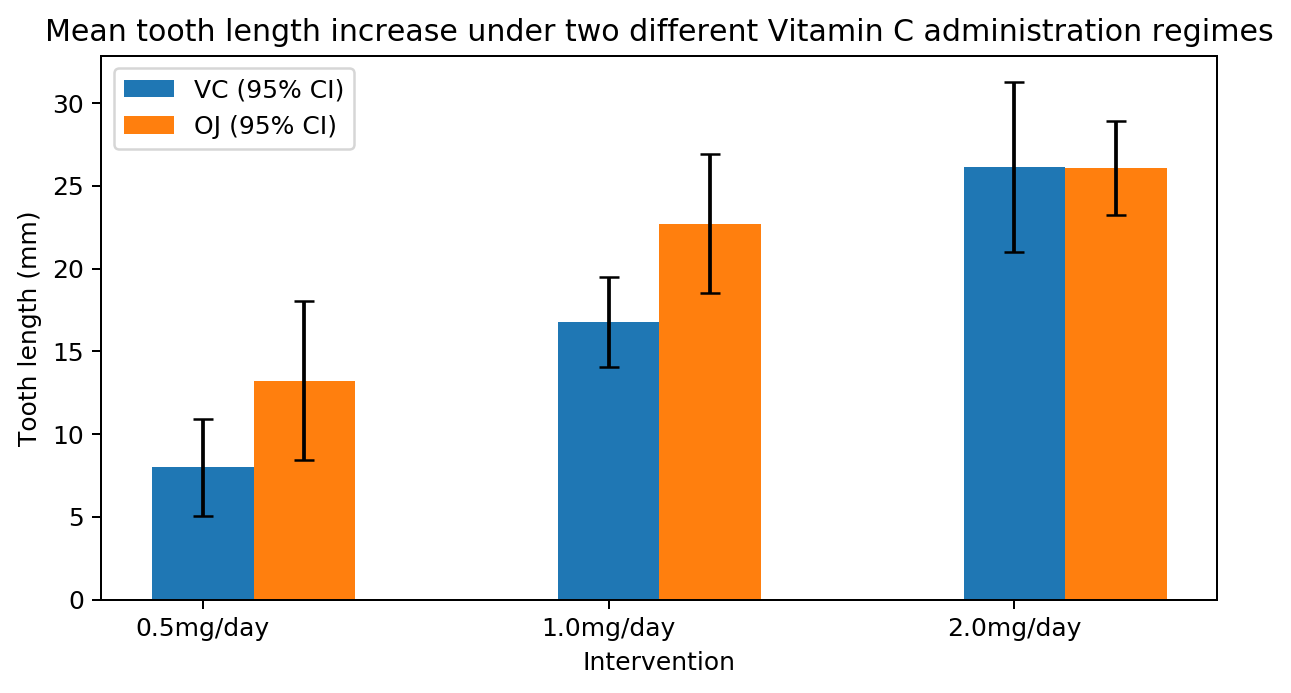

In [95]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# plot the 95% CI for these means, which is 1.96 times the standard error

def ci95(x, axis):
    return 1.96 * (np.std(x,axis=axis) / np.sqrt(len(x)))

ax.bar(np.arange(len(interventions)), np.mean(vcs,axis=1)[:,1], color='C0', 
       width=0.25, label="VC (95% CI)", yerr=ci95(vcs,axis=1)[:,1], capsize=4)
ax.bar(np.arange(len(interventions))+0.25, np.mean(ojs, axis=1)[:,1], color='C1', 
       width=0.25, label="OJ (95% CI)", yerr=ci95(ojs,axis=1)[:,1], capsize=4)

ax.legend()
ax.set_ylabel("Tooth length (mm)")
ax.set_xlabel("Intervention")
ax.set_xticks([0,1,2])
ax.set_title("Mean tooth length increase under two different Vitamin C administration regimes")
ax.set_xticklabels(["0.5mg/day","1.0mg/day","2.0mg/day"])

#### Error bar choice
There are several choices for the error bars:
* the **standard deviation**
* the **standard error**
* **confidence intervals** (e.g. 95%)
* **nonparametric intervals** such as interquartile ranges.

We won't cover the details of these choices here.  Whichever is used, it should be made clear in the plot what the error bars mean. There is no universal standard, and it must be labeled in the plot or in the accompanying caption.

### Box plots
A very good choice for this type of plot is to use a **Box plot**, as we saw earlier. This makes clear the spread of values that were encountered in a very compact form.

No handles with labels found to put in legend.


[Text(0, 0, '0.5mg/day'), Text(0, 0, '1.0mg/day'), Text(0, 0, '2.0mg/day')]

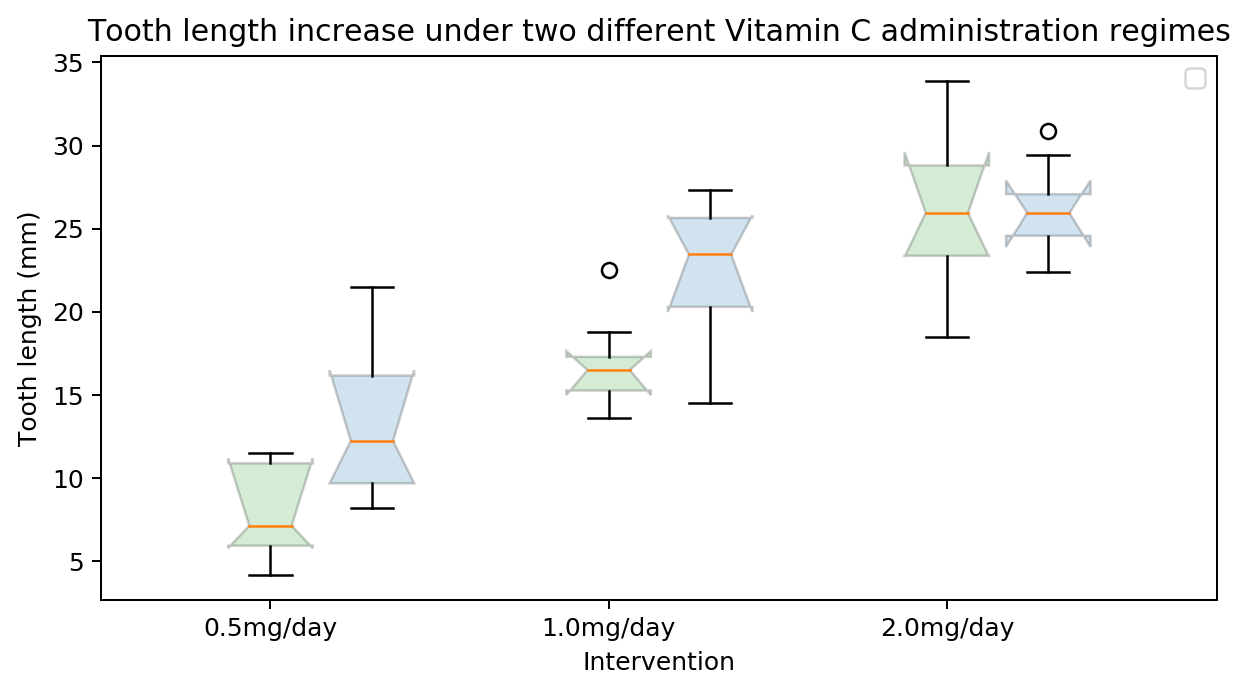

In [96]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)


ax.boxplot(vcs[:,:,1].T, positions = np.arange(3), widths=0.25, notch=True, bootstrap=1000, 
           patch_artist=True, boxprops={"facecolor":'C2', "alpha":0.2})
ax.boxplot(ojs[:,:,1].T, positions = np.arange(3)+0.3, widths=0.25, 
          notch=True, bootstrap=1000,
          patch_artist=True, boxprops={"facecolor":'C0', "alpha":0.2})

ax.legend()
ax.set_ylabel("Tooth length (mm)")
ax.set_xlabel("Intervention")
ax.set_xticks([0,1,2])
ax.set_title("Tooth length increase under two different Vitamin C administration regimes")
ax.set_xticklabels(["0.5mg/day","1.0mg/day","2.0mg/day"])

[Text(0, 0, '0.5mg/day'), Text(0, 0, '1.0mg/day'), Text(0, 0, '2.0mg/day')]

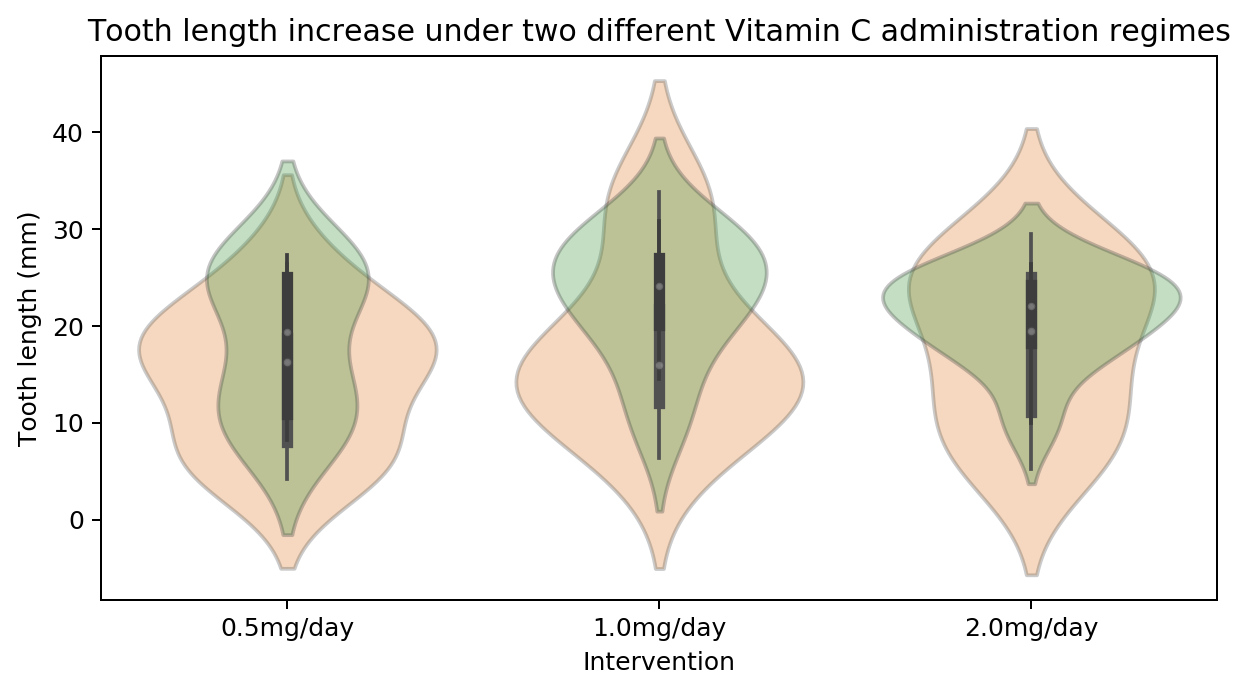

In [97]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

xs = np.tile(np.arange(3), (1,10))
sns.violinplot(xs.ravel(), vcs[:,:,1].ravel(), color='C1')
sns.violinplot(x=xs.ravel(), y=ojs[:,:,1].ravel(), color='C2')
plt.setp(ax.collections, alpha=.3)
ax.set_ylabel("Tooth length (mm)")
ax.set_xlabel("Intervention")
ax.set_xticks([0,1,2])
ax.set_title("Tooth length increase under two different Vitamin C administration regimes")
ax.set_xticklabels(["0.5mg/day","1.0mg/day","2.0mg/day"])

## Dot plot
An alternative is simply to jitter the points on the x-axis slightly:


No handles with labels found to put in legend.


(3, 10, 4)


[Text(0, 0, '0.5mg/day'), Text(0, 0, '1.0mg/day'), Text(0, 0, '2.0mg/day')]

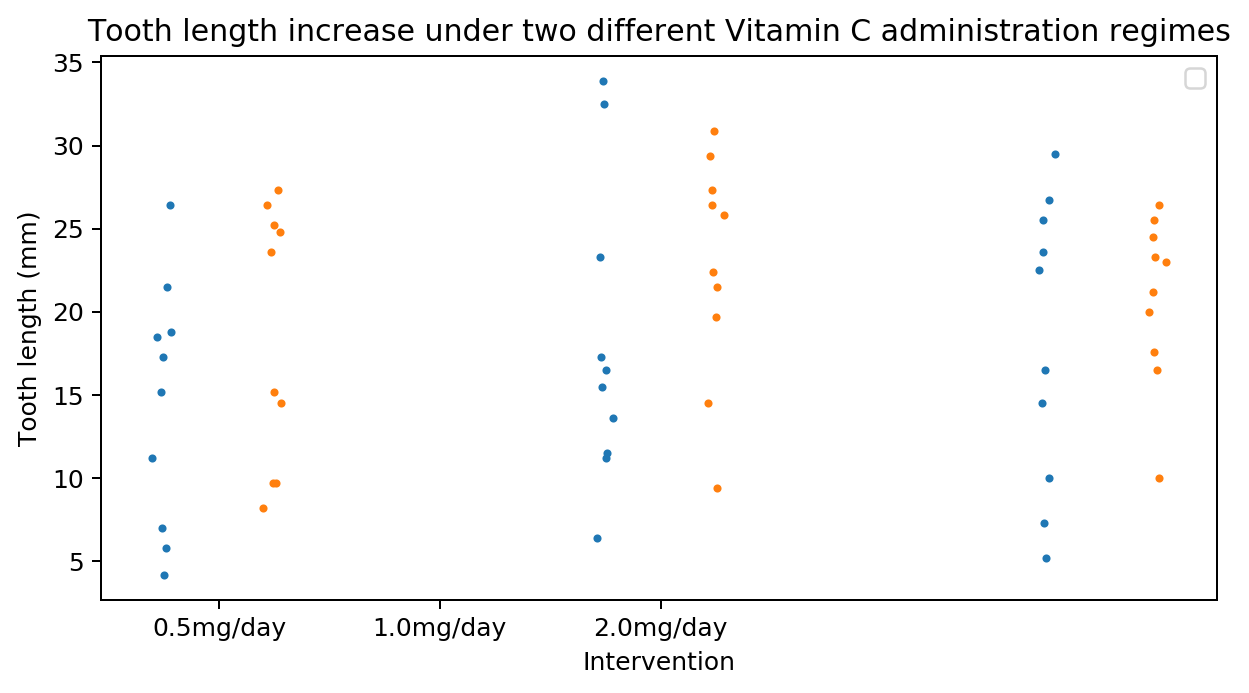

In [98]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
print(vcs.shape)

xs = np.tile(np.arange(3), (1,10))
noise = np.random.normal(0,0.02,xs.shape) + xs

ax.scatter(xs-0.25+noise, vcs[:,:,1], s=5)
ax.scatter(xs+0.25+noise, ojs[:,:,1], s=5)

ax.legend()
ax.set_ylabel("Tooth length (mm)")
ax.set_xlabel("Intervention")
ax.set_xticks([0,1,2])
ax.set_title("Tooth length increase under two different Vitamin C administration regimes")
ax.set_xticklabels(["0.5mg/day","1.0mg/day","2.0mg/day"])

This is especially effective with larger amounts of data

No handles with labels found to put in legend.


(27, 4) (27, 3)


[Text(0, 0, 'Winter'),
 Text(0, 0, 'Spring'),
 Text(0, 0, 'Summer'),
 Text(0, 0, 'Autumn')]

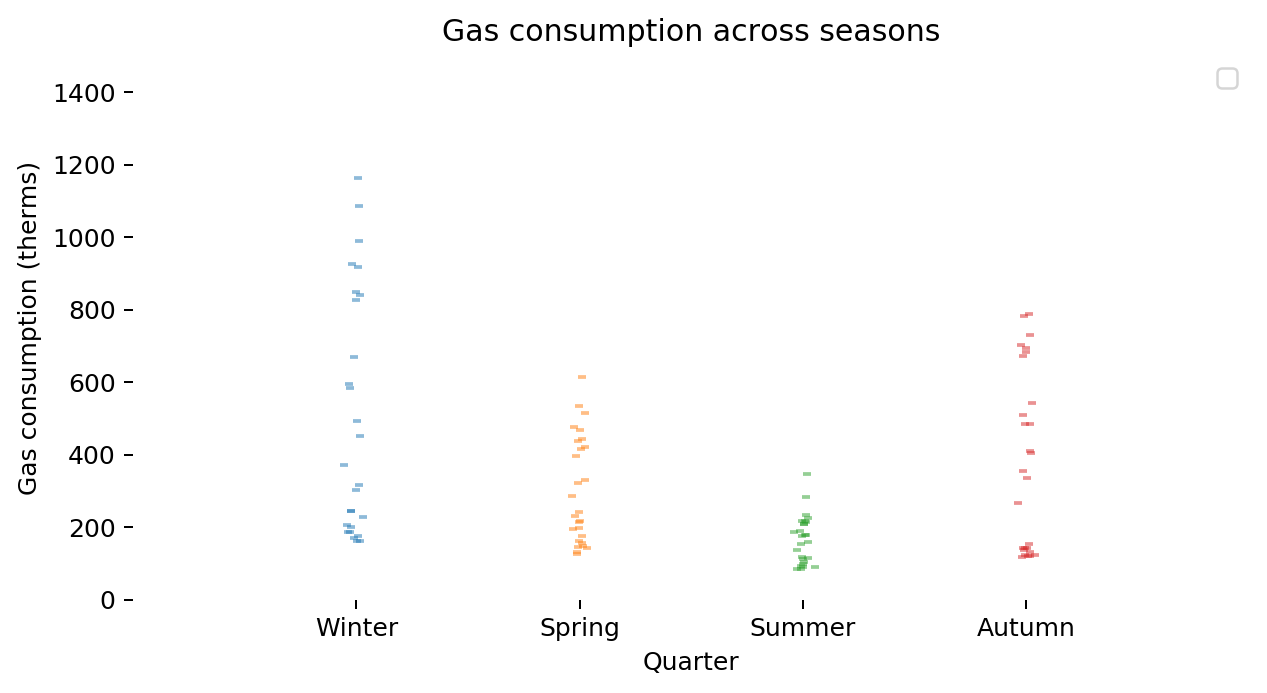

In [99]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)



xs = np.tile(np.arange(4), (len(q1), 1))
noise = np.random.normal(0,0.02,xs.shape) + xs
print(xs.shape, q1.shape)
ax.scatter(noise[:,0], q1[:,2], s=9, alpha=0.5, marker='_')
ax.scatter(noise[:,1], q2[:,2], s=9, alpha=0.5, marker='_')
ax.scatter(noise[:,2], q3[:,2], s=9, alpha=0.5, marker='_')
ax.scatter(noise[:,3], q4[:,2], s=9, alpha=0.5, marker='_')


ax.legend()
ax.set_xlim(-1,4)
ax.set_ylim(0, 1500)

ax.set_ylabel("Gas consumption (therms)")
ax.set_xlabel("Quarter")
ax.set_xticks([0,1,2,3])
ax.set_frame_on(False)

ax.set_title("Gas consumption across seasons")
ax.set_xticklabels(["Winter", "Spring", "Summer", "Autumn"])

### Areas we haven't covered

There are many other areas of visualisation which we will not be able to cover in this course.

* **Discrete structure visualisations** are focused on visualising discrete structures like graphs, networks and trees (e.g. for genome analysis). Representing connectivity between elements is an important part of such visualisations.
<img src="imgs/connect_graph.png">

*Image a discrete graph visualisation credit: screenshot from Mike Bostock's [d3.js blog](https://bl.ocks.org/mbostock/4063550)*

* **Geographical visualisations**  are focused on relaying geographical information (e.g. maps of gravitational field strength across the Earth). Correct *projection* and *interpolation* of data with geographical coordinates is key in these visualisations.
<img src="imgs/grav_map.jpg">

*Image: gravitational variations across the planet credit: [NASA](https://eoimages.gsfc.nasa.gov/images/imagerecords/3000/3666/PIA04652_lrg.jpg); public domain*

* **High dimensional visualisations** are used to represent data with many variables (e.g. a table with many rows) in a single 2D (or 3D) plot. Various mathematical techniques are used to "squeeze" data onto a space so that important relationships are preserved. Faithful representation of original structure and dealing with clutter are important issues in high-d visualisation.
<img src="imgs/tsne.png"> 

*[Image](https://flickr.com/photos/kylemcdonald/25478228166 "Parametric t-SNE on MNIST"): low dimensional embedding of digits by [Kyle McDonald](https://flickr.com/people/kylemcdonald) shared [CC BY](https://creativecommons.org/licenses/by/2.0/)*
(see [here](http://fontjoy.com/projector/) for a cool example of embedding fonts in high dimensions).

* **Volume visualisations** are intended to reveal the structure of solid 3D bodies (e.g. from computer-aided tomography; CAT scans). Representing depth and dealing with **occlusion** are key challenges in volume visualisations.
<img src="imgs/ct_scan.gif">

*Image: Volume rendering of a human skull  credit: By [Arielinson - Own work, CC BY-SA 4.0](https://commons.wikimedia.org/w/index.php?curid=50903553)*

* **Interactive visualisations** There is a whole field of research into experimental visualisations, dealing with large scale data, high dimensional data, data with complex structures, among other topics. Many of these visualisations involve interactive elements to allow users to *explore* as well as *view* them. You can see lots of these in browser at the [excellent d3.js gallery](https://github.com/d3/d3/wiki/Gallery)

## Resources

* **Ten simple rules for better figures** http://journals.plos.org/ploscompbiol/article/file?id=10.1371/journal.pcbi.1003833&type=printable (and the accomapnying video https://www.youtube.com/watch?v=p7Mj-4kASmI) (**recommended; read this and watch the video**)

* **Layered Grammar of Graphics** http://vita.had.co.nz/papers/layered-grammar.pdf (long, but detailed)

* **How to choose a chart for data** http://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf

#### Beyond this course:
* **Randal Olson's blog** http://www.randalolson.com has many, many examples of good visualization, mainly using Python for graph preparation.
* **How to Lie with Statistics** Darrel Huff (short, easy to read, worth reading)
* **Grammar of Graphics** by Leland Wilkinson (ISBN-13: 978-0387245447): **the** book on a computational approach to scientific visualisation.
* **Information Visualization: Perception for Design** Colin Ware: a serious book on advanced visualisations.

##### The classic Tufte books
<img src="imgs/tufte.jpg">

* **The Visual Display of Quantitative Information** by Edward Tufte
* **Visual Explanations: Images and Quantities, Evidence and Narrative** by Edward Tufte
* **Envisioning Information** by Edward Tufte

---
    